In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from crea_visualizza_istanza import *
from controlli_ammissibilita import *
from greedy import *
from local_search import *
from greedy_rand import *
from grasp import *
from tabu_search import *
from iterated_local_search import *
from visualizza_grafici import *
from clark_wright import *
import os



In [3]:


## Istanza 

delta_small = 1.5
G_small, residui_dict_small = generate_instance(num_bambini=200, pos_min=20, pos_max=50, seed=3, delta= delta_small)
#plot_graph(G_small, 'grafo_dim_ridotte.png')
img = 'images/small/'
os.makedirs(img, exist_ok=True)


#Stampo i nodi e le relative posizioni
for node, data in G_small.nodes(data=True):
    print(f"Nodo: {node}, Posizione: {data['pos']}, Massima Distanza: {data['max_distance']}")

#print("\n")

#Stampo gli archi e i relativi pesi
#for u, v, data in G_small.edges(data=True):
#    print(f"Arco: {u} - {v}, Peso: {data['weight']}")

subsequentNN = []
schoolNN = []
ls_best = []
ls_first = []
ls_subsequentNN = []
ls_schoolNN = []
grasp_subsequentNN = []
grasp_schoolNN = []
tabu_subsequentNN = []
tabu_schoolNN = []
Ils_subsequentNN = []
Ils_schoolNN = []
grasp_bI = []
tabu_bI = []
ils_bI = []
grasp_fI = []
tabu_fI = []
ils_fI = []
times_small = []


Nodo: Bambino_1, Posizione: [36.52393708 41.24443468], Massima Distanza: 3.0
Nodo: Bambino_2, Posizione: [28.72714217 35.32482816], Massima Distanza: 13.5
Nodo: Bambino_3, Posizione: [46.78840863 46.88879267], Massima Distanza: 19.5
Nodo: Bambino_4, Posizione: [23.76755931 26.21728634], Massima Distanza: 28.5
Nodo: Bambino_5, Posizione: [21.5440161  33.22429531], Massima Distanza: 24.0
Nodo: Bambino_6, Posizione: [20.89628633 33.70499673], Massima Distanza: 25.5
Nodo: Bambino_7, Posizione: [39.47432143 28.35461848], Massima Distanza: 19.5
Nodo: Bambino_8, Posizione: [40.28764706 37.72588452], Massima Distanza: 9.0
Nodo: Bambino_9, Posizione: [20.71945647 36.76562264], Massima Distanza: 24.0
Nodo: Bambino_10, Posizione: [27.77757341 32.45303591], Massima Distanza: 18.0
Nodo: Bambino_11, Posizione: [28.50575245 40.79413755], Massima Distanza: 12.0
Nodo: Bambino_12, Posizione: [33.21361153 24.70603215], Massima Distanza: 24.0
Nodo: Bambino_13, Posizione: [36.33947054 43.40944294], Massima

# Greedy small

In [4]:



(percorsi_sub_NN, sub_NN_obj_val, residui_dict_small_sub_NN), time = subsequent_nearest_neighbour(G_small, residui_dict_small, delta_small)
stampa_percorsi(percorsi_sub_NN)
print(f"Funzione obiettivo: {sub_NN_obj_val}")
check_solution(percorsi_sub_NN, G_small, delta_small)
subsequentNN.append(sub_NN_obj_val)
times_small.append(time)


Tempo impiegato: 00:00:0.050569
### Visualizzazione dei Percorsi ###

Percorso 1: Scuola → Bambino_1 → Bambino_113 → Bambino_13 → Bambino_134 → Bambino_171
Percorso 2: Scuola → Bambino_104 → Bambino_145 → Bambino_160 → Bambino_178 → Bambino_56 → Bambino_140 → Bambino_28 → Bambino_24 → Bambino_50 → Bambino_96 → Bambino_88 → Bambino_27 → Bambino_102 → Bambino_179
Percorso 3: Scuola → Bambino_121 → Bambino_152 → Bambino_19 → Bambino_43 → Bambino_153 → Bambino_46 → Bambino_37 → Bambino_138 → Bambino_74 → Bambino_95 → Bambino_44 → Bambino_90 → Bambino_77 → Bambino_84 → Bambino_151 → Bambino_167
Percorso 4: Scuola → Bambino_170 → Bambino_30 → Bambino_29 → Bambino_73 → Bambino_52 → Bambino_81
Percorso 5: Scuola → Bambino_188 → Bambino_36 → Bambino_8 → Bambino_163 → Bambino_89 → Bambino_53 → Bambino_100 → Bambino_162 → Bambino_79 → Bambino_119
Percorso 6: Scuola → Bambino_183 → Bambino_31 → Bambino_11 → Bambino_63 → Bambino_51 → Bambino_120 → Bambino_169
Percorso 7: Scuola → Bambino_67 → Bambi

In [5]:

(percorsi_sch_NN, sch_NN_obj_val, residui_dict_small_sch_NN), time = school_nearest_neighbour(G_small, residui_dict_small, delta_small)
#stampa_percorsi(percorsi_sch_NN)
print(f"Funzione obiettivo: {sch_NN_obj_val}")
check_solution(percorsi_sch_NN, G_small, delta_small)
schoolNN.append(sch_NN_obj_val)
times_small.append(time)


Tempo impiegato: 00:00:0.008879
Funzione obiettivo: 2800703
Soluzione ammissibile.


In [6]:

(percorsi_sub_NN_R, sub_NN_R_obj_val, residui_dict_small_sub_NN_R), time = subsequent_nearest_neighbour_randomized(G_small, residui_dict_small, delta_small, k=3)
#stampa_percorsi(percorsi_sub_NN)
print(f"Funzione obiettivo: {sub_NN_R_obj_val}")
check_solution(percorsi_sub_NN_R, G_small, delta_small)
subsequentNN.append(sub_NN_R_obj_val)
times_small.append(time)


Tempo impiegato: 00:00:0.047775
Funzione obiettivo: 3600889
Soluzione ammissibile.


In [7]:

(percorsi_sch_NN_R, sch_NN_R_obj_val, residui_dict_small_sch_NN_R), time = school_nearest_neighbour_randomized(G_small, residui_dict_small, delta_small, k=3)
#stampa_percorsi(percorsi_sch_NN_R)
print(f"Funzione obiettivo: {sch_NN_R_obj_val}")
check_solution(percorsi_sch_NN_R, G_small, delta_small)
schoolNN.append(sch_NN_R_obj_val)
times_small.append(time)



Tempo impiegato: 00:00:0.008502
Funzione obiettivo: 3400836
Soluzione ammissibile.


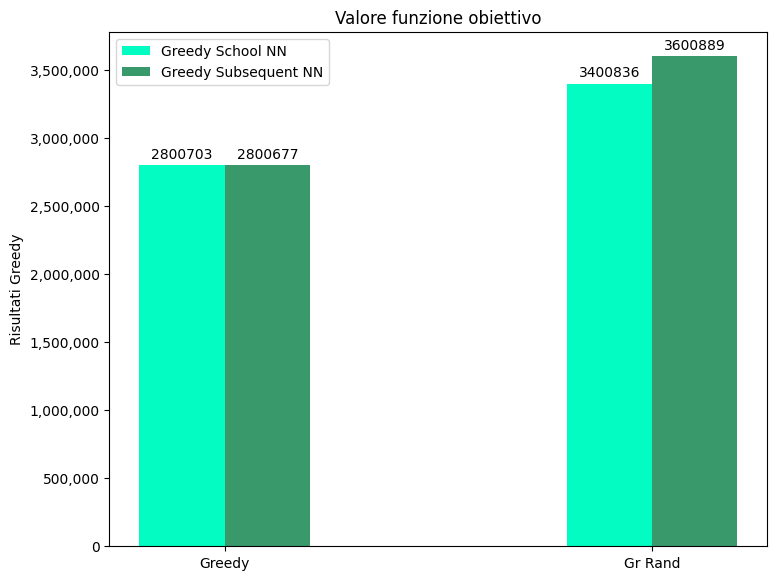

In [8]:
plotSubSchResults(subsequentNN, schoolNN, "Greedy", img + 'greedy_small.png')

In [9]:
#i = prova(G_small, residui_dict_small, delta_small, k=2, num_greedy=1000, ls="local_search_bI", max_len=5)

# Local Search small

In [10]:
(percorsi_ls_bI, ls_bI_obj_val, residui_dict_small_sub_ls_bI), time = local_search_bI(G_small, residui_dict_small_sub_NN, percorsi_sub_NN, sub_NN_obj_val, delta_small, max_len=6)
#stampa_percorsi(percorsi_ls_bI)
print(f"Funzione obiettivo: {ls_bI_obj_val}")
check_solution(percorsi_ls_bI, G_small, delta_small)
ls_subsequentNN.append(ls_bI_obj_val)
ls_best.append(ls_bI_obj_val)
times_small.append(time)

Tempo impiegato: 00:00:0.209635
Funzione obiettivo: 2800677
Soluzione ammissibile.


In [11]:
(percorsi_ls_bI, ls_bI_obj_val, residui_dict_small_ls_sch_bI), time = local_search_bI(G_small, residui_dict_small_sch_NN, percorsi_sch_NN, sch_NN_obj_val, delta_small, max_len=5)
#stampa_percorsi(percorsi_ls_bI)
print(f"Funzione obiettivo: {ls_bI_obj_val}")
check_solution(percorsi_ls_bI, G_small, delta_small)
ls_schoolNN.append(ls_bI_obj_val)
ls_best.append(ls_bI_obj_val)
times_small.append(time)

Tempo impiegato: 00:00:0.078942
Funzione obiettivo: 2800703
Soluzione ammissibile.


In [12]:
(percorsi_sub_ls_fI, sub_ls_fI_obj_val, residui_dict_small_sub_ls_fI), time = local_search_fI(G_small, residui_dict_small_sub_NN, percorsi_sub_NN, sub_NN_obj_val, delta_small, max_len=5)
#stampa_percorsi(percorsi_ls_fI)
print(f"Funzione obiettivo: {sub_ls_fI_obj_val}")
check_solution(percorsi_sub_ls_fI, G_small, delta_small)
ls_subsequentNN.append(sub_ls_fI_obj_val)
ls_first.append(sub_ls_fI_obj_val)
times_small.append(time)

Tempo impiegato: 00:00:0.193263
Funzione obiettivo: 2800673
Soluzione ammissibile.


In [13]:
(percorsi_sch_ls_fI, sch_ls_fI_obj_val, residui_dict_small_sch_ls_fI), time = local_search_fI(G_small, residui_dict_small_sch_NN, percorsi_sch_NN, sch_NN_obj_val, delta_small, max_len=5)
#stampa_percorsi(percorsi_ls_bI)
print(f"Funzione obiettivo: {sch_ls_fI_obj_val}")
check_solution(percorsi_sch_ls_fI, G_small, delta_small)
ls_schoolNN.append(sch_ls_fI_obj_val)
ls_first.append(sch_ls_fI_obj_val)
times_small.append(time)

Tempo impiegato: 00:00:0.102106
Funzione obiettivo: 2800699
Soluzione ammissibile.


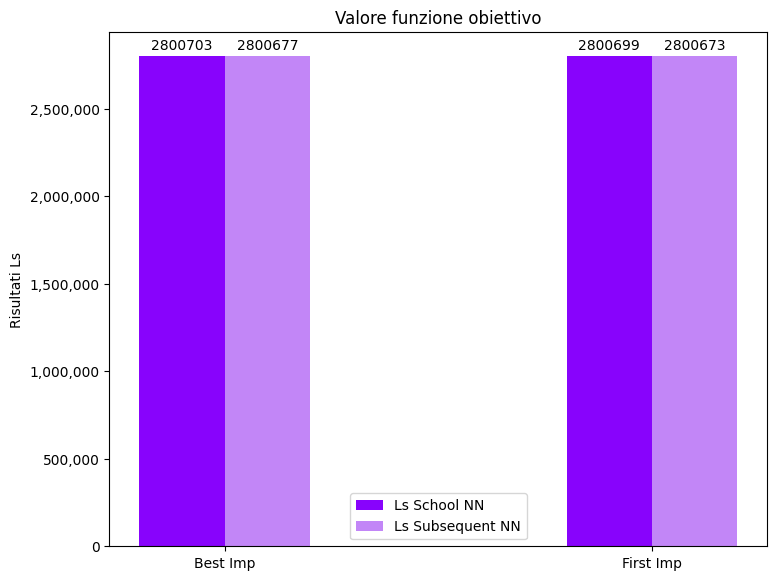

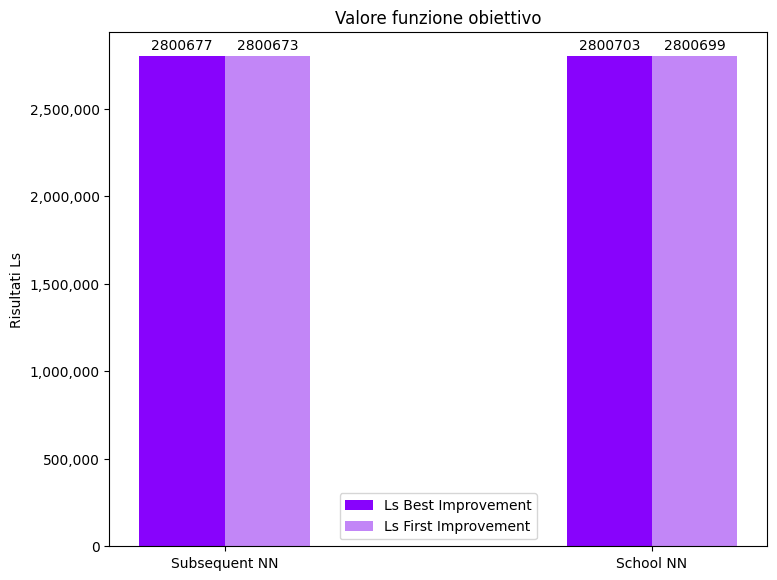

In [14]:

plotSubSchResults(ls_subsequentNN, ls_schoolNN, 'Ls', img + 'ls_small_sub_sch.png')
plotBestFirstResults(ls_best, ls_first, 'Ls', img + 'ls_small_best_first.png')

# Grasp small

1
Tempo impiegato: 00:00:0.036683
Tempo impiegato: 00:00:0.480021
2
Tempo impiegato: 00:00:0.033332
Tempo impiegato: 00:00:0.770618
3
Tempo impiegato: 00:00:0.034147
Tempo impiegato: 00:00:0.607572
4
Tempo impiegato: 00:00:0.035058
Tempo impiegato: 00:00:0.903594
5
Tempo impiegato: 00:00:0.033167
Tempo impiegato: 00:00:0.607093
6
Tempo impiegato: 00:00:0.032254
Tempo impiegato: 00:00:0.730192
7
Tempo impiegato: 00:00:0.033111
Tempo impiegato: 00:00:0.536740
8
Tempo impiegato: 00:00:0.038775
Tempo impiegato: 00:00:0.628641
9
Tempo impiegato: 00:00:0.033111
Tempo impiegato: 00:00:0.699886
10
Tempo impiegato: 00:00:0.033273
Tempo impiegato: 00:00:0.569609
11
Tempo impiegato: 00:00:0.033925
Tempo impiegato: 00:00:0.454122
12
Tempo impiegato: 00:00:0.033000
Tempo impiegato: 00:00:0.700605
13
Tempo impiegato: 00:00:0.033236
Tempo impiegato: 00:00:0.397735
14
Tempo impiegato: 00:00:0.032761
Tempo impiegato: 00:00:0.399771
15
Tempo impiegato: 00:00:0.033053
Tempo impiegato: 00:00:0.512159
16
T

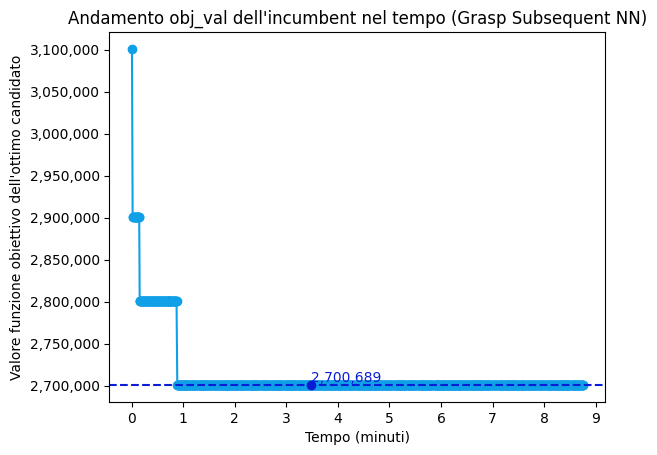

397
Tempo impiegato: 00:08:45.022981
Funzione obiettivo: 2700689
Soluzione ammissibile.


In [15]:

(percorsi_G_sub_NN_bI, G_sub_NN_bI_obj_val, residui_dict_small_G_sub_NN_bI), time = GRASP_subsequent_NN(G_small, residui_dict_small, delta_small, k=2, num_greedy=1000, ls="local_search_bI", max_len=5, img="images/small/grasp_sub_bI_time.png")
#stampa_percorsi(percorsi_G_sub_NN_bI)
print(f"Funzione obiettivo: {G_sub_NN_bI_obj_val}")
check_solution(percorsi_G_sub_NN_bI, G_small, delta_small)
grasp_subsequentNN.append(G_sub_NN_bI_obj_val)
grasp_bI.append(G_sub_NN_bI_obj_val)
times_small.append(time)

1
Tempo impiegato: 00:00:0.034817
Tempo impiegato: 00:00:0.444099
2
Tempo impiegato: 00:00:0.033805
Tempo impiegato: 00:00:0.345482
3
Tempo impiegato: 00:00:0.032519
Tempo impiegato: 00:00:0.696747
4
Tempo impiegato: 00:00:0.034481
Tempo impiegato: 00:00:0.503316
5
Tempo impiegato: 00:00:0.033120
Tempo impiegato: 00:00:0.568036
6
Tempo impiegato: 00:00:0.033022
Tempo impiegato: 00:00:0.998914
7
Tempo impiegato: 00:00:0.034246
Tempo impiegato: 00:00:0.371478
8
Tempo impiegato: 00:00:0.034096
Tempo impiegato: 00:00:1.137920
9
Tempo impiegato: 00:00:0.033103
Tempo impiegato: 00:00:0.946221
10
Tempo impiegato: 00:00:0.032665
Tempo impiegato: 00:00:0.498881
11
Tempo impiegato: 00:00:0.034522
Tempo impiegato: 00:00:0.458410
12
Tempo impiegato: 00:00:0.031639
Tempo impiegato: 00:00:0.548753
13
Tempo impiegato: 00:00:0.034167
Tempo impiegato: 00:00:0.497531
14
Tempo impiegato: 00:00:0.033785
Tempo impiegato: 00:00:0.602910
15
Tempo impiegato: 00:00:0.033132
Tempo impiegato: 00:00:0.878384
16
T

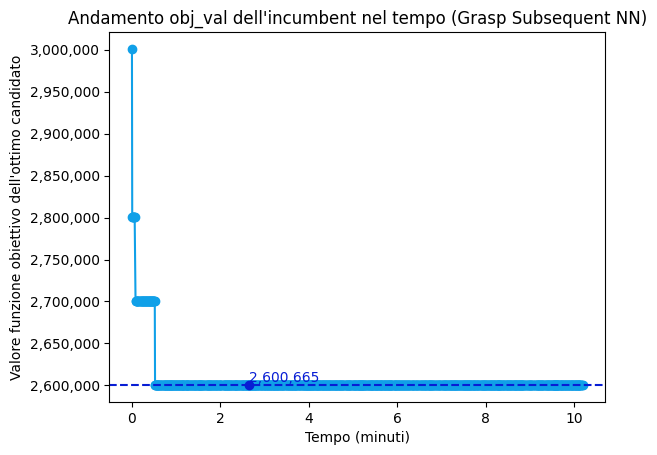

263
Tempo impiegato: 00:10:11.935210
Funzione obiettivo: 2600665
Soluzione ammissibile.


In [16]:
(percorsi_G_sub_NN_fI, G_sub_NN_fI_obj_val, residui_dict_small_G_sub_NN_fI), time = GRASP_subsequent_NN(G_small, residui_dict_small, delta_small, k=2, num_greedy=1000, ls="local_search_fI", max_len=5, img="images/small/grasp_sub_fI_time.png")
#stampa_percorsi(percorsi_G_sub_NN_fI)
print(f"Funzione obiettivo: {G_sub_NN_fI_obj_val}")
check_solution(percorsi_G_sub_NN_fI, G_small, delta_small)
grasp_subsequentNN.append(G_sub_NN_fI_obj_val)
grasp_fI.append(G_sub_NN_fI_obj_val)
times_small.append(time)

1
Tempo impiegato: 00:00:0.007168
Tempo impiegato: 00:00:0.109950
2
Tempo impiegato: 00:00:0.007162
Tempo impiegato: 00:00:0.079728
3
Tempo impiegato: 00:00:0.007078
Tempo impiegato: 00:00:0.210447
4
Tempo impiegato: 00:00:0.006865
Tempo impiegato: 00:00:0.043163
5
Tempo impiegato: 00:00:0.007116
Tempo impiegato: 00:00:0.145584
6
Tempo impiegato: 00:00:0.006722
Tempo impiegato: 00:00:0.226346
7
Tempo impiegato: 00:00:0.006689
Tempo impiegato: 00:00:0.135211
8
Tempo impiegato: 00:00:0.006952
Tempo impiegato: 00:00:0.097907
9
Tempo impiegato: 00:00:0.007174
Tempo impiegato: 00:00:0.151768
10
Tempo impiegato: 00:00:0.007077
Tempo impiegato: 00:00:0.231590
11
Tempo impiegato: 00:00:0.007194
Tempo impiegato: 00:00:0.285837
12
Tempo impiegato: 00:00:0.007199
Tempo impiegato: 00:00:0.097255
13
Tempo impiegato: 00:00:0.007125
Tempo impiegato: 00:00:0.186663
14
Tempo impiegato: 00:00:0.007396
Tempo impiegato: 00:00:0.374999
15
Tempo impiegato: 00:00:0.007012
Tempo impiegato: 00:00:0.434648
16
T

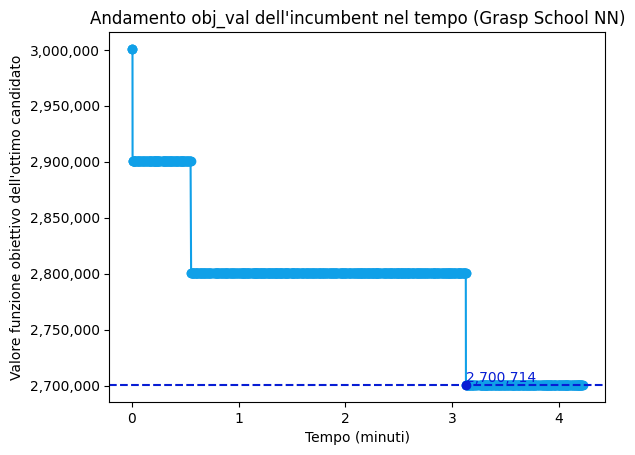

Tempo impiegato: 00:04:13.582727
Funzione obiettivo: 2700714
Soluzione ammissibile.


In [17]:
(percorsi_G_sch_bI, G_sch_bI_obj_val, residui_dict_small_G_sch_NN_bI), time = GRASP_School_NN(G_small, residui_dict_small, delta_small, k=2, num_greedy=1000, ls="local_search_bI", max_len=5, img="images/small/grasp_sch_bI_time.png")
#stampa_percorsi(percorsi_G_sch_bI)
print(f"Funzione obiettivo: {G_sch_bI_obj_val}")
check_solution(percorsi_G_sch_bI, G_small, delta_small)
grasp_schoolNN.append(G_sch_bI_obj_val)
grasp_bI.append(G_sch_bI_obj_val)
times_small.append(time)

1
Tempo impiegato: 00:00:0.007820
Tempo impiegato: 00:00:0.405518
2
Tempo impiegato: 00:00:0.006999
Tempo impiegato: 00:00:0.425827
3
Tempo impiegato: 00:00:0.006761
Tempo impiegato: 00:00:0.329932
4
Tempo impiegato: 00:00:0.007016
Tempo impiegato: 00:00:0.226258
5
Tempo impiegato: 00:00:0.006947
Tempo impiegato: 00:00:0.217045
6
Tempo impiegato: 00:00:0.006848
Tempo impiegato: 00:00:0.409290
7
Tempo impiegato: 00:00:0.006672
Tempo impiegato: 00:00:0.151617
8
Tempo impiegato: 00:00:0.006310
Tempo impiegato: 00:00:0.168489
9
Tempo impiegato: 00:00:0.006511
Tempo impiegato: 00:00:0.197360
10
Tempo impiegato: 00:00:0.006435
Tempo impiegato: 00:00:0.223459
11
Tempo impiegato: 00:00:0.007000
Tempo impiegato: 00:00:0.136331
12
Tempo impiegato: 00:00:0.006495
Tempo impiegato: 00:00:0.368359
13
Tempo impiegato: 00:00:0.006860
Tempo impiegato: 00:00:0.246678
14
Tempo impiegato: 00:00:0.007172
Tempo impiegato: 00:00:0.587061
15
Tempo impiegato: 00:00:0.006713
Tempo impiegato: 00:00:0.165543
16
T

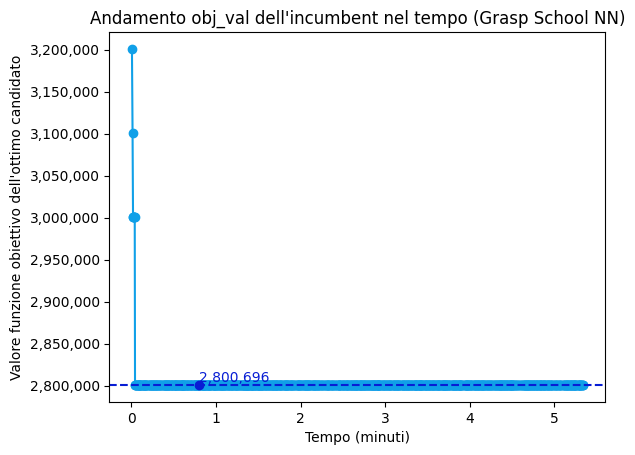

Tempo impiegato: 00:05:20.323418
Funzione obiettivo: 2800696
Soluzione ammissibile.


In [18]:
(percorsi_G_sch_fI, G_sch_fI_obj_val, residui_dict_small_G_sch_NN_fI), time = GRASP_School_NN(G_small, residui_dict_small, delta_small, k=2, num_greedy=1000, ls="local_search_fI", max_len=5, img="images/small/grasp_sch_fI_time.png")
#stampa_percorsi(percorsi_G_sch_fI)
print(f"Funzione obiettivo: {G_sch_fI_obj_val}")
check_solution(percorsi_G_sch_fI, G_small, delta_small)
grasp_schoolNN.append(G_sch_fI_obj_val)
grasp_fI.append(G_sch_fI_obj_val)
times_small.append(time)

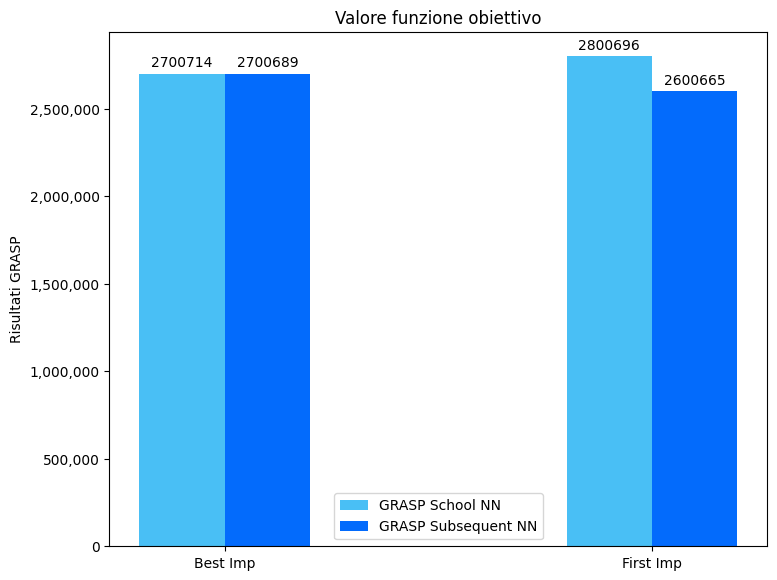

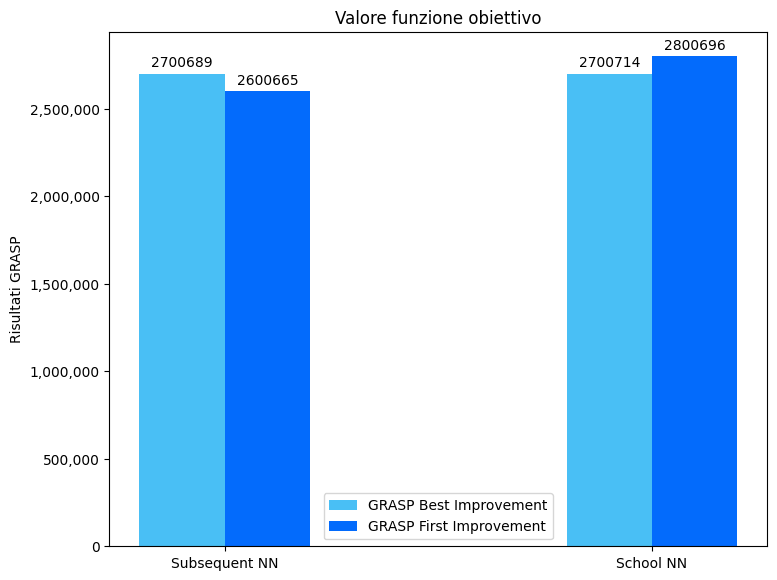

In [19]:
plotSubSchResults(grasp_subsequentNN, grasp_schoolNN, 'GRASP', img + 'grasp_small_sub_sch.png')
plotBestFirstResults(grasp_bI, grasp_fI, 'GRASP', img + 'grasp_small_best_first.png')

# Tabu Search small

Iterazione: 0, Non migliorato: 0, Current OV: 2800677, Best OV: 2800677
Iterazione: 1, Non migliorato: 0, Current OV: 2800675, Best OV: 2800675
Iterazione: 2, Non migliorato: 0, Current OV: 2800674, Best OV: 2800674
Iterazione: 3, Non migliorato: 0, Current OV: 2800673, Best OV: 2800673
Iterazione: 4, Non migliorato: 1, Current OV: 2800673, Best OV: 2800673
Iterazione: 5, Non migliorato: 2, Current OV: 2800673, Best OV: 2800673
Iterazione: 6, Non migliorato: 3, Current OV: 2800673, Best OV: 2800673
Iterazione: 7, Non migliorato: 4, Current OV: 2800673, Best OV: 2800673
Iterazione: 8, Non migliorato: 5, Current OV: 2800673, Best OV: 2800673
Iterazione: 9, Non migliorato: 6, Current OV: 2800673, Best OV: 2800673
Iterazione: 10, Non migliorato: 7, Current OV: 2800673, Best OV: 2800673
Iterazione: 11, Non migliorato: 8, Current OV: 2800673, Best OV: 2800673
Iterazione: 12, Non migliorato: 9, Current OV: 2800690, Best OV: 2800673
Iterazione: 13, Non migliorato: 10, Current OV: 2800690, Best

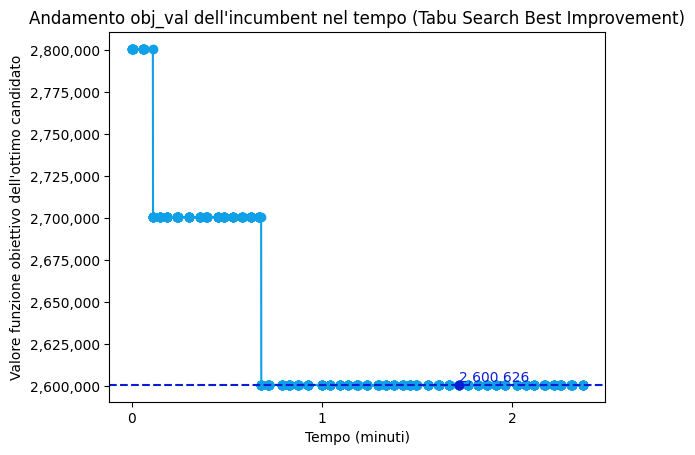

Tempo impiegato: 00:02:22.407644
Funzione obiettivo: 2600626
Soluzione ammissibile.


In [20]:

(percorsi_tabu_sub, tabu_sub_obj_val, residui_dict_small_tabu_sub), time = tabu_search_bI(G_small, residui_dict_small_sub_NN, percorsi_sub_NN, sub_NN_obj_val, delta_small, max_len=5, img="images/small/tabu_sub_bI_time.png")
#stampa_percorsi(percorsi_sub_NN)
print(f"Funzione obiettivo: {tabu_sub_obj_val}")
check_solution(percorsi_tabu_sub, G_small, delta_small)
tabu_subsequentNN.append(tabu_sub_obj_val)
tabu_bI.append(tabu_sub_obj_val)   
times_small.append(time)

Iterazione: 0, Non migliorato: 0, Current OV: 2800677, Best OV: 2800677
Iterazione: 1, Non migliorato: 0, Current OV: 2800676, Best OV: 2800676
Iterazione: 2, Non migliorato: 0, Current OV: 2800675, Best OV: 2800675
Iterazione: 3, Non migliorato: 0, Current OV: 2800674, Best OV: 2800674
Iterazione: 4, Non migliorato: 0, Current OV: 2800673, Best OV: 2800673
Iterazione: 5, Non migliorato: 1, Current OV: 2800673, Best OV: 2800673
Iterazione: 6, Non migliorato: 2, Current OV: 2800673, Best OV: 2800673
Iterazione: 7, Non migliorato: 3, Current OV: 2800673, Best OV: 2800673
Iterazione: 8, Non migliorato: 4, Current OV: 2800673, Best OV: 2800673
Iterazione: 9, Non migliorato: 5, Current OV: 2800673, Best OV: 2800673
Iterazione: 10, Non migliorato: 6, Current OV: 2800673, Best OV: 2800673
Iterazione: 11, Non migliorato: 7, Current OV: 2800673, Best OV: 2800673
Iterazione: 12, Non migliorato: 8, Current OV: 2800679, Best OV: 2800673
Iterazione: 13, Non migliorato: 9, Current OV: 2800679, Best 

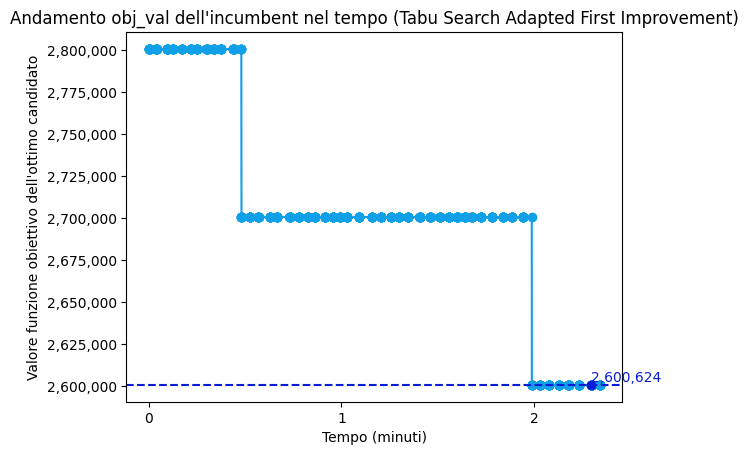

Tempo impiegato: 00:02:20.593653
Funzione obiettivo: 2600624
Soluzione ammissibile.


In [21]:

(percorsi_tabu_sub, tabu_sub_obj_val, residui_dict_small_tabu_sub), time = tabu_search_fI(G_small, residui_dict_small_sub_NN, percorsi_sub_NN, sub_NN_obj_val, delta_small, max_len=5, img="images/small/tabu_sub_fI_time.png")
#stampa_percorsi(percorsi_sub_NN)
print(f"Funzione obiettivo: {tabu_sub_obj_val}")
check_solution(percorsi_tabu_sub, G_small, delta_small)
tabu_subsequentNN.append(tabu_sub_obj_val)
tabu_fI.append(tabu_sub_obj_val)
times_small.append(time)

Iterazione: 0, Non migliorato: 0, Current OV: 2800703, Best OV: 2800703
Iterazione: 1, Non migliorato: 0, Current OV: 2800701, Best OV: 2800701
Iterazione: 2, Non migliorato: 0, Current OV: 2800700, Best OV: 2800700
Iterazione: 3, Non migliorato: 0, Current OV: 2800699, Best OV: 2800699
Iterazione: 4, Non migliorato: 0, Current OV: 2800698, Best OV: 2800698
Iterazione: 5, Non migliorato: 0, Current OV: 2800697, Best OV: 2800697
Iterazione: 6, Non migliorato: 1, Current OV: 2800697, Best OV: 2800697
Iterazione: 7, Non migliorato: 2, Current OV: 2800697, Best OV: 2800697
Iterazione: 8, Non migliorato: 3, Current OV: 2800697, Best OV: 2800697
Iterazione: 9, Non migliorato: 4, Current OV: 2800697, Best OV: 2800697
Iterazione: 10, Non migliorato: 5, Current OV: 2800697, Best OV: 2800697
Iterazione: 11, Non migliorato: 6, Current OV: 2800697, Best OV: 2800697
Iterazione: 12, Non migliorato: 7, Current OV: 2800704, Best OV: 2800697
Iterazione: 13, Non migliorato: 8, Current OV: 2800704, Best 

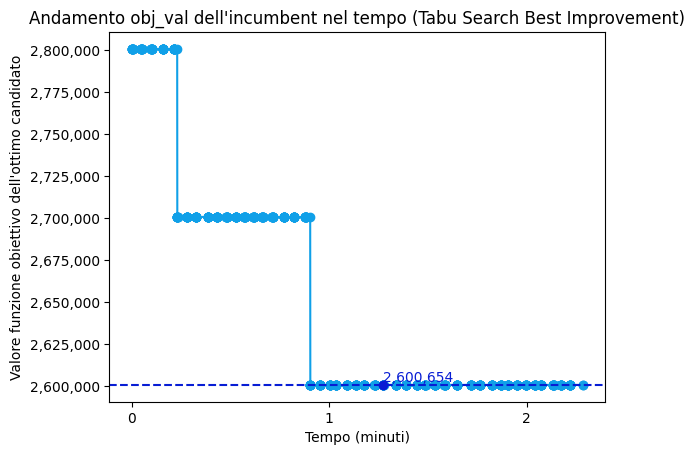

Tempo impiegato: 00:02:17.142552
Funzione obiettivo: 2600654
Soluzione ammissibile.


In [22]:
(percorsi_tabu_sch, tabu_sch_obj_val, residui_dict_small_tabu_sch), time = tabu_search_bI(G_small, residui_dict_small_sch_NN, percorsi_sch_NN, sch_NN_obj_val, delta_small, max_len=5, img="images/small/tabu_sch_bI_time.png")
#stampa_percorsi(percorsi_sub_NN)
print(f"Funzione obiettivo: {tabu_sch_obj_val}")
check_solution(percorsi_tabu_sch, G_small, delta_small)
tabu_schoolNN.append(tabu_sch_obj_val)
tabu_bI.append(tabu_sch_obj_val)
times_small.append(time)

Iterazione: 0, Non migliorato: 0, Current OV: 2800703, Best OV: 2800703
Iterazione: 1, Non migliorato: 0, Current OV: 2800702, Best OV: 2800702
Iterazione: 2, Non migliorato: 0, Current OV: 2800701, Best OV: 2800701
Iterazione: 3, Non migliorato: 0, Current OV: 2800700, Best OV: 2800700
Iterazione: 4, Non migliorato: 0, Current OV: 2800699, Best OV: 2800699
Iterazione: 5, Non migliorato: 0, Current OV: 2800697, Best OV: 2800697
Iterazione: 6, Non migliorato: 1, Current OV: 2800697, Best OV: 2800697
Iterazione: 7, Non migliorato: 2, Current OV: 2800697, Best OV: 2800697
Iterazione: 8, Non migliorato: 3, Current OV: 2800697, Best OV: 2800697
Iterazione: 9, Non migliorato: 4, Current OV: 2800697, Best OV: 2800697
Iterazione: 10, Non migliorato: 5, Current OV: 2800697, Best OV: 2800697
Iterazione: 11, Non migliorato: 6, Current OV: 2800697, Best OV: 2800697
Iterazione: 12, Non migliorato: 0, Current OV: 2800696, Best OV: 2800696
Iterazione: 13, Non migliorato: 0, Current OV: 2800695, Best 

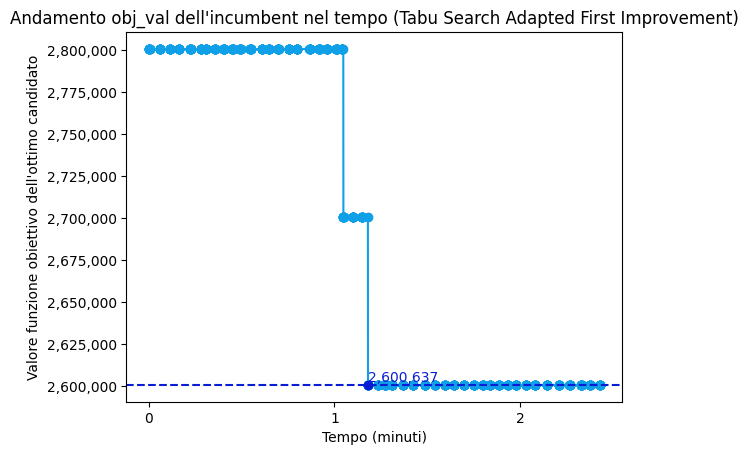

Tempo impiegato: 00:02:25.912384
Funzione obiettivo: 2600637
Soluzione ammissibile.


In [23]:
(percorsi_tabu_sch, tabu_sch_obj_val, residui_dict_small_tabu_sch), time = tabu_search_fI(G_small, residui_dict_small_sch_NN, percorsi_sch_NN, sch_NN_obj_val, delta_small, max_len=5, img="images/small/tabu_sch_fI_time.png")
#stampa_percorsi(percorsi_sub_NN)
print(f"Funzione obiettivo: {tabu_sch_obj_val}")
check_solution(percorsi_tabu_sch, G_small, delta_small)
tabu_schoolNN.append(tabu_sch_obj_val)
tabu_fI.append(tabu_sch_obj_val)
times_small.append(time)

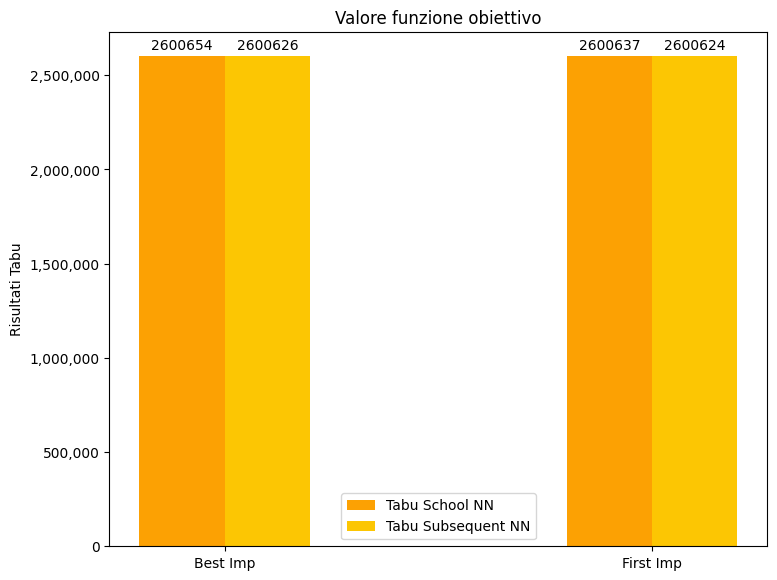

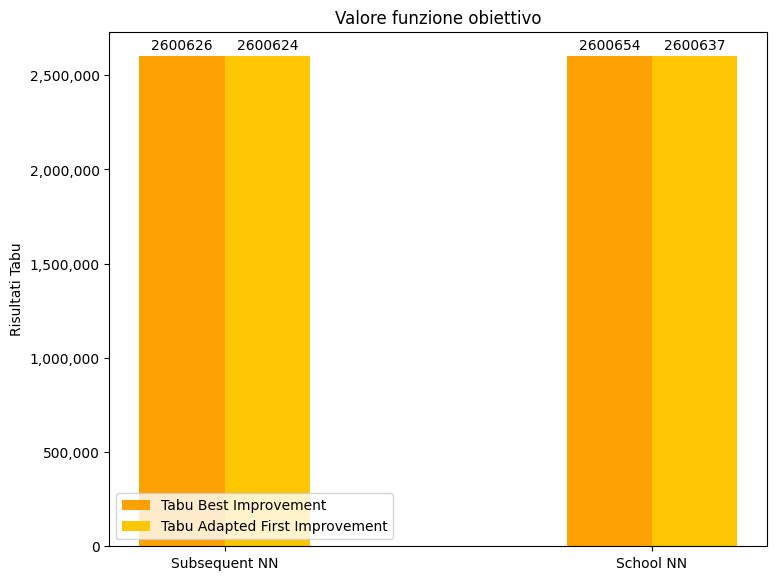

In [24]:
plotSubSchResults(tabu_subsequentNN, tabu_schoolNN, 'Tabu' , img + 'tabu_search_small_sub_sch.png')
plotBestFirstResults(tabu_bI, tabu_fI, 'Tabu', img + 'tabu_search_small_best_first.png')

# Iterated Search small

Tempo impiegato: 00:00:0.096523
Temperatura: 160, Current OV: 2800677, Best OV: 2800677
Tempo impiegato: 00:00:0.059462
Temperatura: 160, ls OV: 2800687, Best OV: 2800677
r : 0.017426952815763563 soglia:  0.9394130628134758
Temperatura: 160, Current OV: 2800687, Best OV: 2800677
Tempo impiegato: 00:00:0.233322
Temperatura: 160, ls OV: 2800690, Best OV: 2800677
r : 0.3299389441639755 soglia:  0.9814246877477771
Temperatura: 160, Current OV: 2800690, Best OV: 2800677
Tempo impiegato: 00:00:0.241924
Temperatura: 160, ls OV: 2800690, Best OV: 2800677
r : 0.38433210241825944 soglia:  1.0
Temperatura: 160, Current OV: 2800690, Best OV: 2800677
Tempo impiegato: 00:00:0.242721
Temperatura: 160, ls OV: 2800695, Best OV: 2800677
r : 0.07482859086436999 soglia:  0.9692332344763441
Temperatura: 160, Current OV: 2800695, Best OV: 2800677
Tempo impiegato: 00:00:0.164790
Temperatura: 160, ls OV: 2800691, Best OV: 2800677
Temperatura: 160, Current OV: 2800691, Best OV: 2800677
Tempo impiegato: 00:00:0

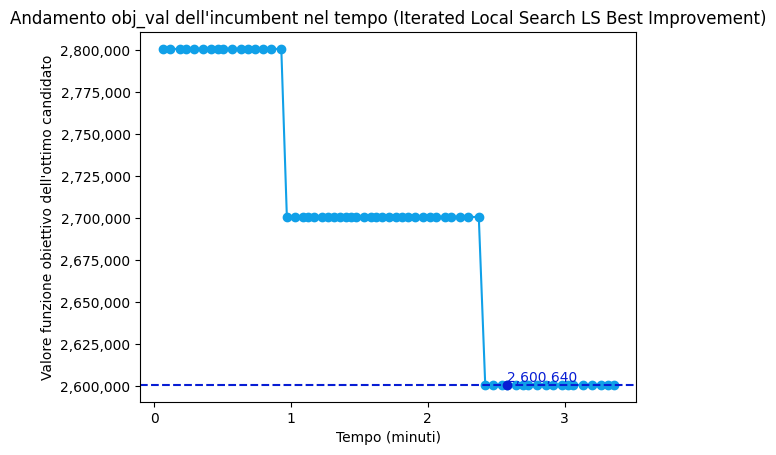

Tempo impiegato: 00:03:21.648099
Funzione obiettivo: 2600640
Soluzione ammissibile.


In [25]:

(percorsi_ILS_sub_bI, ILS_sub_bI_obj_val, residui_dict_small_ILS_sub_bI), time = iterated_local_search(G_small, residui_dict_small_sub_NN, percorsi_sub_NN, sub_NN_obj_val, delta_small, max_len=5, ls="local_search_bI", img="images/small/ils_sub_bI_time.png")
#stampa_percorsi(percorsi_sub_NN)
print(f"Funzione obiettivo: {ILS_sub_bI_obj_val}")
check_solution(percorsi_ILS_sub_bI, G_small, delta_small)
Ils_subsequentNN.append(ILS_sub_bI_obj_val)
ils_bI.append(ILS_sub_bI_obj_val)
times_small.append(time)

Tempo impiegato: 00:00:0.119005
Temperatura: 160, Current OV: 2800677, Best OV: 2800677
Tempo impiegato: 00:00:0.525397
Temperatura: 160, ls OV: 2700672, Best OV: 2800677
Temperatura: 160, Current OV: 2700672, Best OV: 2700672
Tempo impiegato: 00:00:0.105175
Temperatura: 160, ls OV: 2700675, Best OV: 2700672
r : 0.39164088055307544 soglia:  0.9814246877477771
Temperatura: 160, Current OV: 2700675, Best OV: 2700672
Tempo impiegato: 00:00:0.108256
Temperatura: 160, ls OV: 2700671, Best OV: 2700672
Temperatura: 160, Current OV: 2700671, Best OV: 2700671
Tempo impiegato: 00:00:0.085828
Temperatura: 160, ls OV: 2700674, Best OV: 2700671
r : 0.2263840321143138 soglia:  0.9814246877477771
Temperatura: 160, Current OV: 2700674, Best OV: 2700671
Tempo impiegato: 00:00:0.111113
Temperatura: 160, ls OV: 2700668, Best OV: 2700671
Temperatura: 160, Current OV: 2700668, Best OV: 2700668
Tempo impiegato: 00:00:0.107350
Temperatura: 160, ls OV: 2700671, Best OV: 2700668
r : 0.6213703037571653 soglia: 

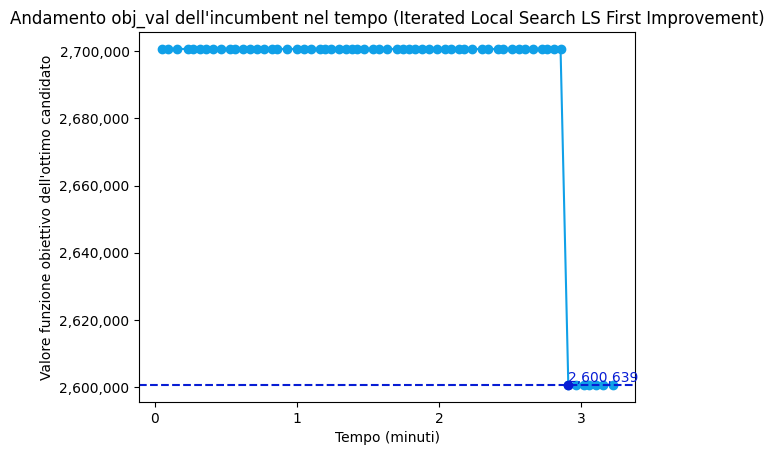

Tempo impiegato: 00:03:13.417668
Funzione obiettivo: 2600639
Soluzione ammissibile.


In [26]:
(percorsi_ILS_sub_fI, ILS_sub_fI_obj_val, residui_dict_small_ILS_sub_fI), time = iterated_local_search(G_small, residui_dict_small_sub_NN, percorsi_sub_NN, sub_NN_obj_val, delta_small, max_len=5, ls="local_search_fI", img="images/small/ils_sub_fI_time.png")
#stampa_percorsi(percorsi_sub_NN)
print(f"Funzione obiettivo: {ILS_sub_fI_obj_val}")
check_solution(percorsi_ILS_sub_fI, G_small, delta_small)
Ils_subsequentNN.append(ILS_sub_fI_obj_val)
ils_fI.append(ILS_sub_fI_obj_val)
times_small.append(time)

Tempo impiegato: 00:00:0.078942
Temperatura: 160, Current OV: 2800703, Best OV: 2800703
Tempo impiegato: 00:00:0.069309
Temperatura: 160, ls OV: 2800705, Best OV: 2800703
r : 0.27049636109786823 soglia:  0.9875778004938814
Temperatura: 160, Current OV: 2800705, Best OV: 2800703
Tempo impiegato: 00:00:0.056573
Temperatura: 160, ls OV: 2800706, Best OV: 2800703
r : 0.26902564844607424 soglia:  0.9937694906233947
Temperatura: 160, Current OV: 2800706, Best OV: 2800703
Tempo impiegato: 00:00:0.075955
Temperatura: 160, ls OV: 2800702, Best OV: 2800703
Temperatura: 160, Current OV: 2800702, Best OV: 2800702
Tempo impiegato: 00:00:0.133212
Temperatura: 160, ls OV: 2700681, Best OV: 2800702
Temperatura: 160, Current OV: 2700681, Best OV: 2700681
Tempo impiegato: 00:00:0.057283
Temperatura: 160, ls OV: 2700685, Best OV: 2700681
r : 0.48916942810603137 soglia:  0.9753099120283326
Temperatura: 160, Current OV: 2700685, Best OV: 2700681
Tempo impiegato: 00:00:0.055009
Temperatura: 160, ls OV: 2700

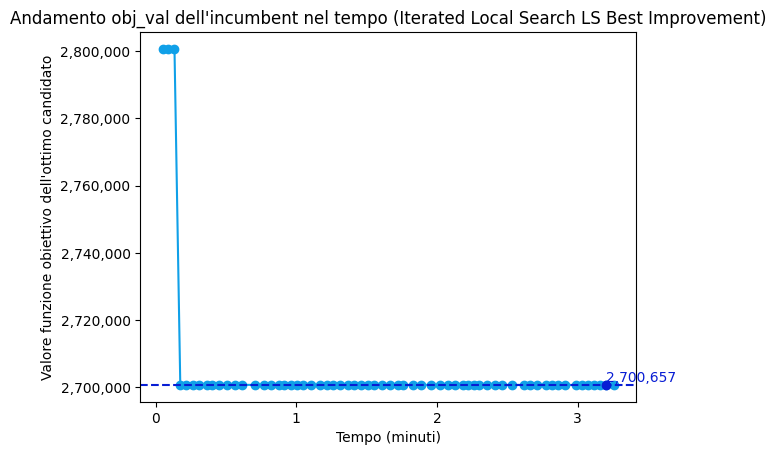

Tempo impiegato: 00:03:15.495851
Funzione obiettivo: 2700657
Soluzione ammissibile.


In [27]:
(percorsi_ILS_sch_bI, ILS_sch_bI_obj_val, residui_dict_small_ILS_sch_bI), time = iterated_local_search(G_small, residui_dict_small_sch_NN, percorsi_sch_NN, sch_NN_obj_val, delta_small, max_len=5, ls="local_search_bI", img="images/small/ils_sch_bI_time.png")
#stampa_percorsi(percorsi_sub_NN)
print(f"Funzione obiettivo: {ILS_sch_bI_obj_val}")
check_solution(percorsi_ILS_sch_bI, G_small, delta_small)
Ils_schoolNN.append(ILS_sch_bI_obj_val)
ils_bI.append(ILS_sch_bI_obj_val)
times_small.append(time)

Tempo impiegato: 00:00:0.105918
Temperatura: 160, Current OV: 2800703, Best OV: 2800703
Tempo impiegato: 00:00:0.071521
Temperatura: 160, ls OV: 2800695, Best OV: 2800703
Temperatura: 160, Current OV: 2800695, Best OV: 2800695
Tempo impiegato: 00:00:0.089935
Temperatura: 160, ls OV: 2800690, Best OV: 2800695
Temperatura: 160, Current OV: 2800690, Best OV: 2800690
Tempo impiegato: 00:00:0.096256
Temperatura: 160, ls OV: 2800685, Best OV: 2800690
Temperatura: 160, Current OV: 2800685, Best OV: 2800685
Tempo impiegato: 00:00:0.175064
Temperatura: 160, ls OV: 2700664, Best OV: 2800685
Temperatura: 160, Current OV: 2700664, Best OV: 2700664
Tempo impiegato: 00:00:0.085909
Temperatura: 160, ls OV: 2700670, Best OV: 2700664
r : 0.6349427518734073 soglia:  0.9631944177208218
Temperatura: 160, Current OV: 2700670, Best OV: 2700664
Tempo impiegato: 00:00:0.078824
Temperatura: 160, ls OV: 2700672, Best OV: 2700664
r : 0.8634099424922826 soglia:  0.9875778004938814
Temperatura: 160, Current OV: 27

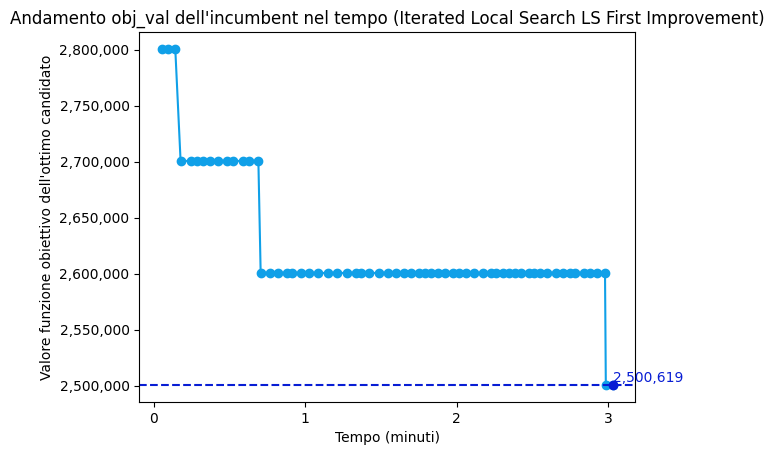

Tempo impiegato: 00:03:1.917374
Funzione obiettivo: 2500619
Soluzione ammissibile.


In [28]:
(percorsi_ILS_sch_fI, ILS_sch_fI_obj_val, residui_dict_small_ILS_sch_fI), time = iterated_local_search(G_small, residui_dict_small_sch_NN, percorsi_sch_NN, sch_NN_obj_val, delta_small, max_len=5, ls="local_search_fI", img="images/small/ils_sch_fI_time.png")
#stampa_percorsi(percorsi_sub_NN)
print(f"Funzione obiettivo: {ILS_sch_fI_obj_val}")
check_solution(percorsi_ILS_sch_fI, G_small, delta_small)
Ils_schoolNN.append(ILS_sch_fI_obj_val)
ils_fI.append(ILS_sch_fI_obj_val)
times_small.append(time)

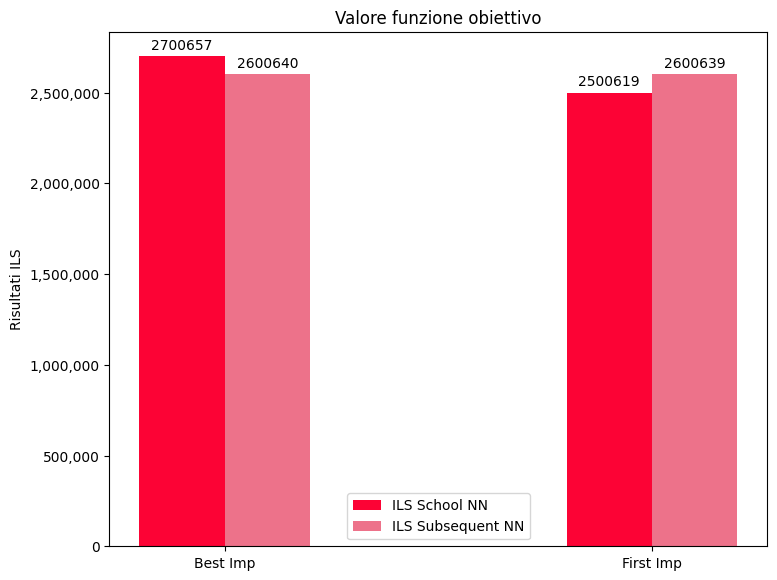

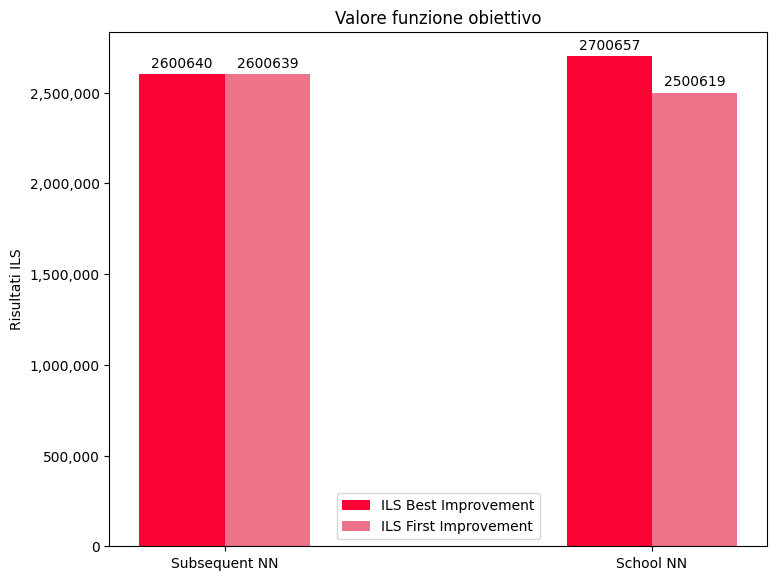

In [29]:
plotSubSchResults(Ils_subsequentNN, Ils_schoolNN, 'ILS', img + 'ils_small_sub_sch.png')

plotBestFirstResults(ils_bI, ils_fI, 'ILS', img + 'ils_small_best_first.png')

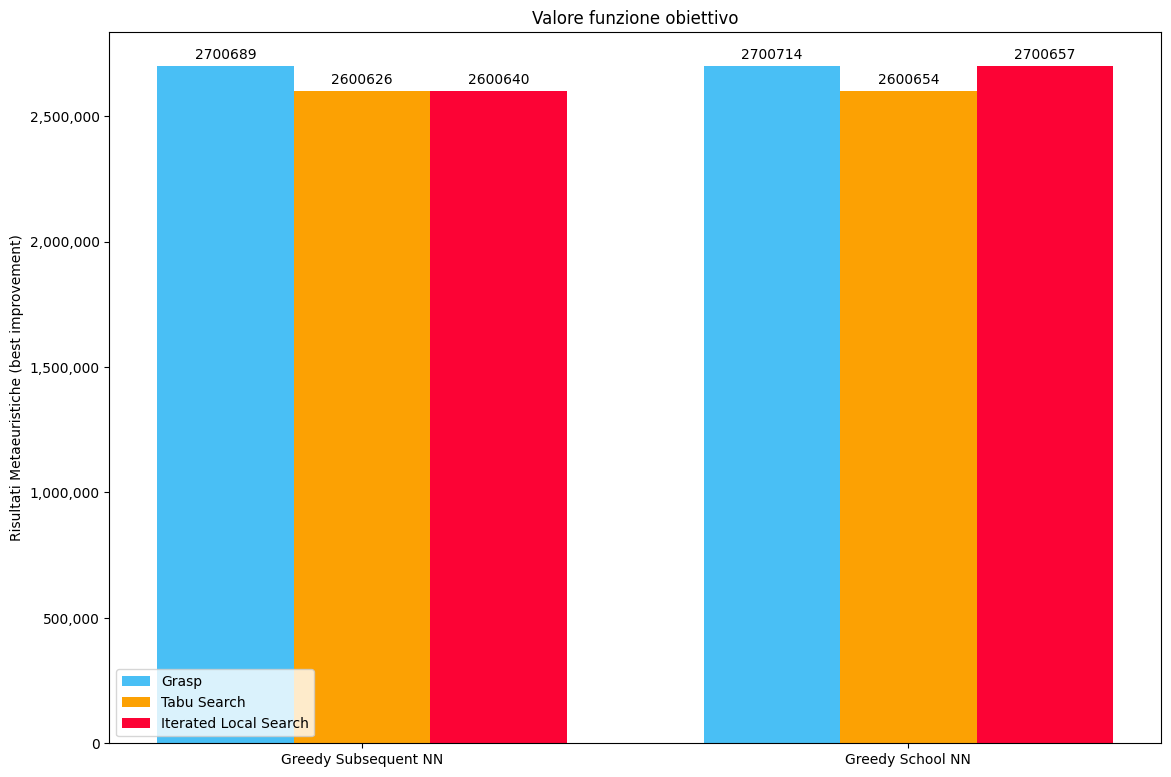

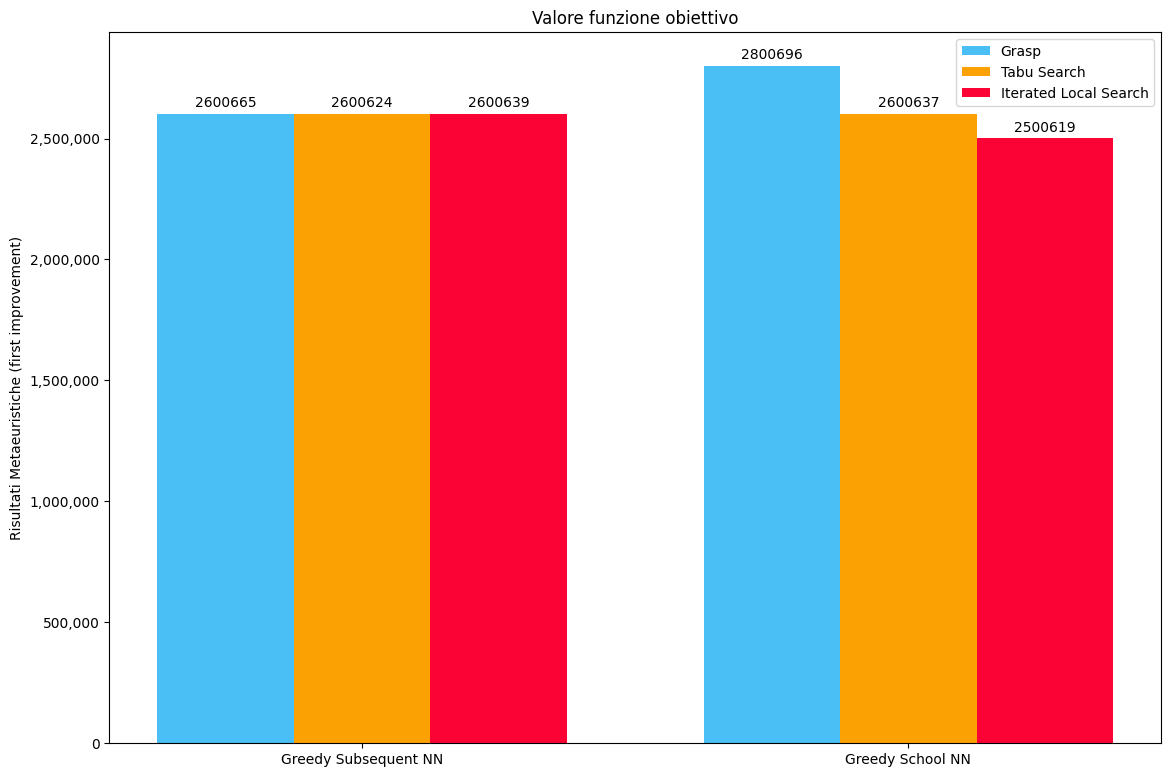

In [30]:
plotMetaheuristicsResults(grasp_bI, tabu_bI, ils_bI, img +'metaheuristics_bI_small.png')
plotMetaheuristicsResults(grasp_fI, tabu_fI, ils_fI, img +'metaheuristics_fI_small.png', bestImp=False)

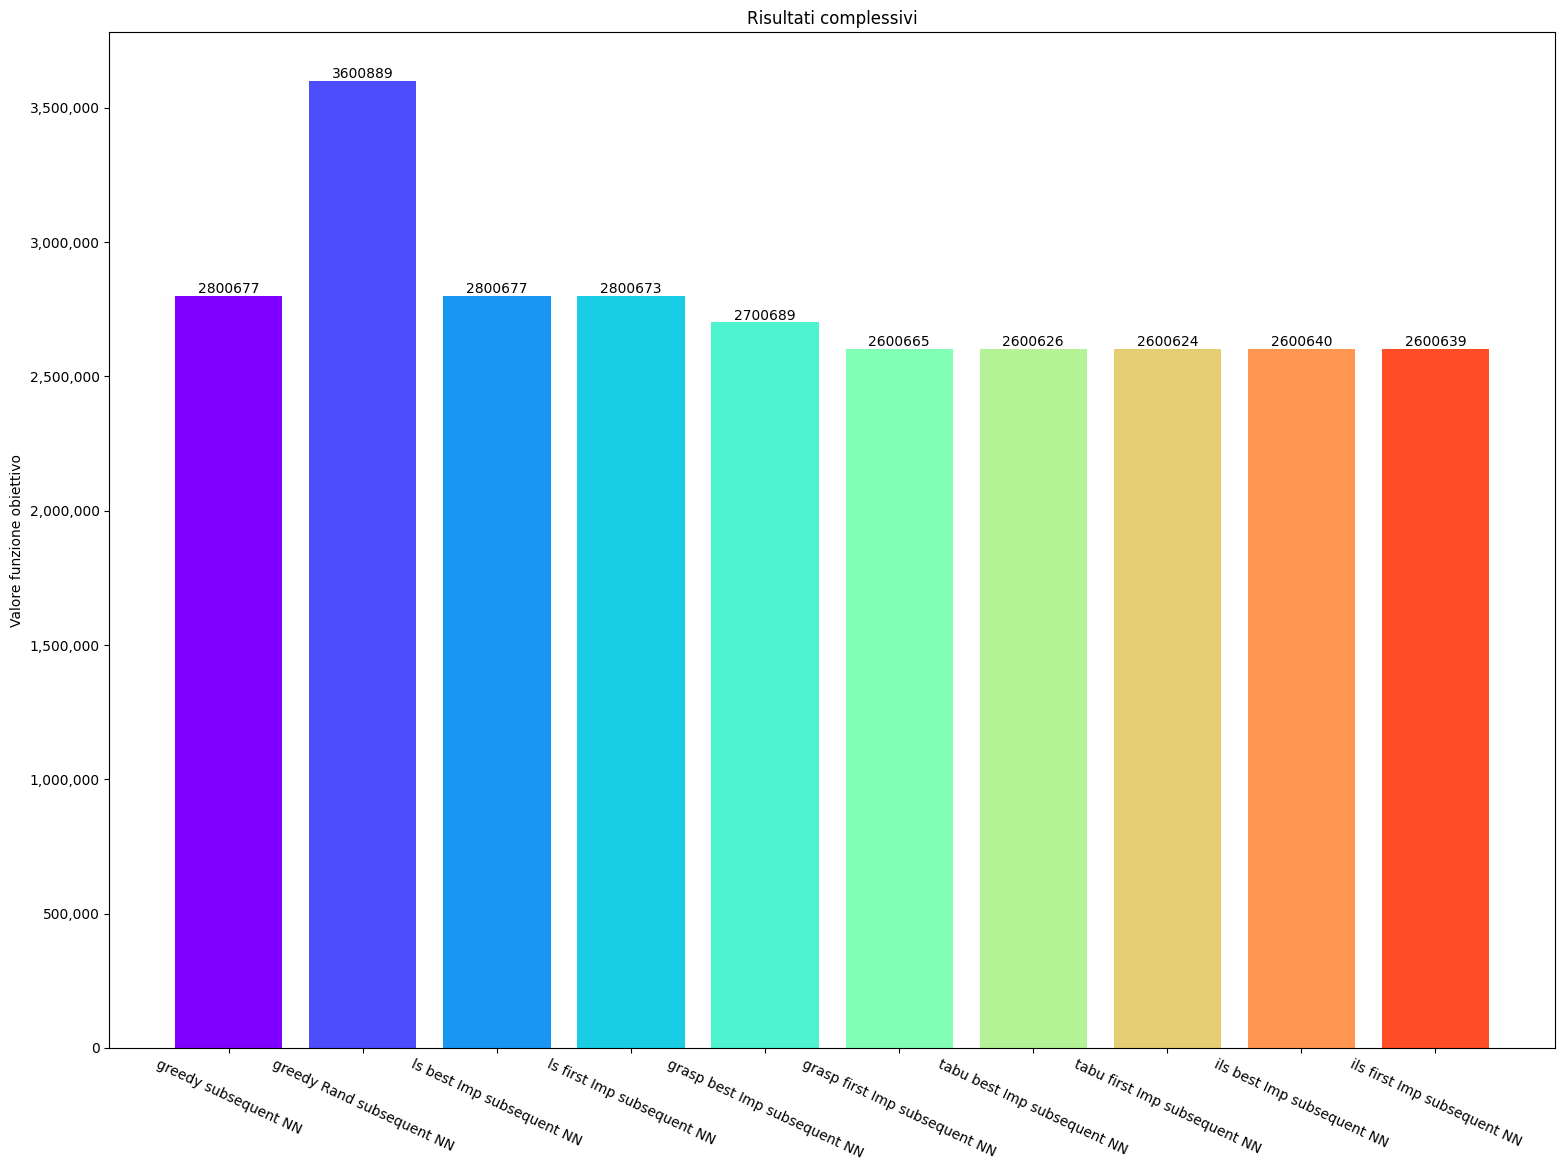

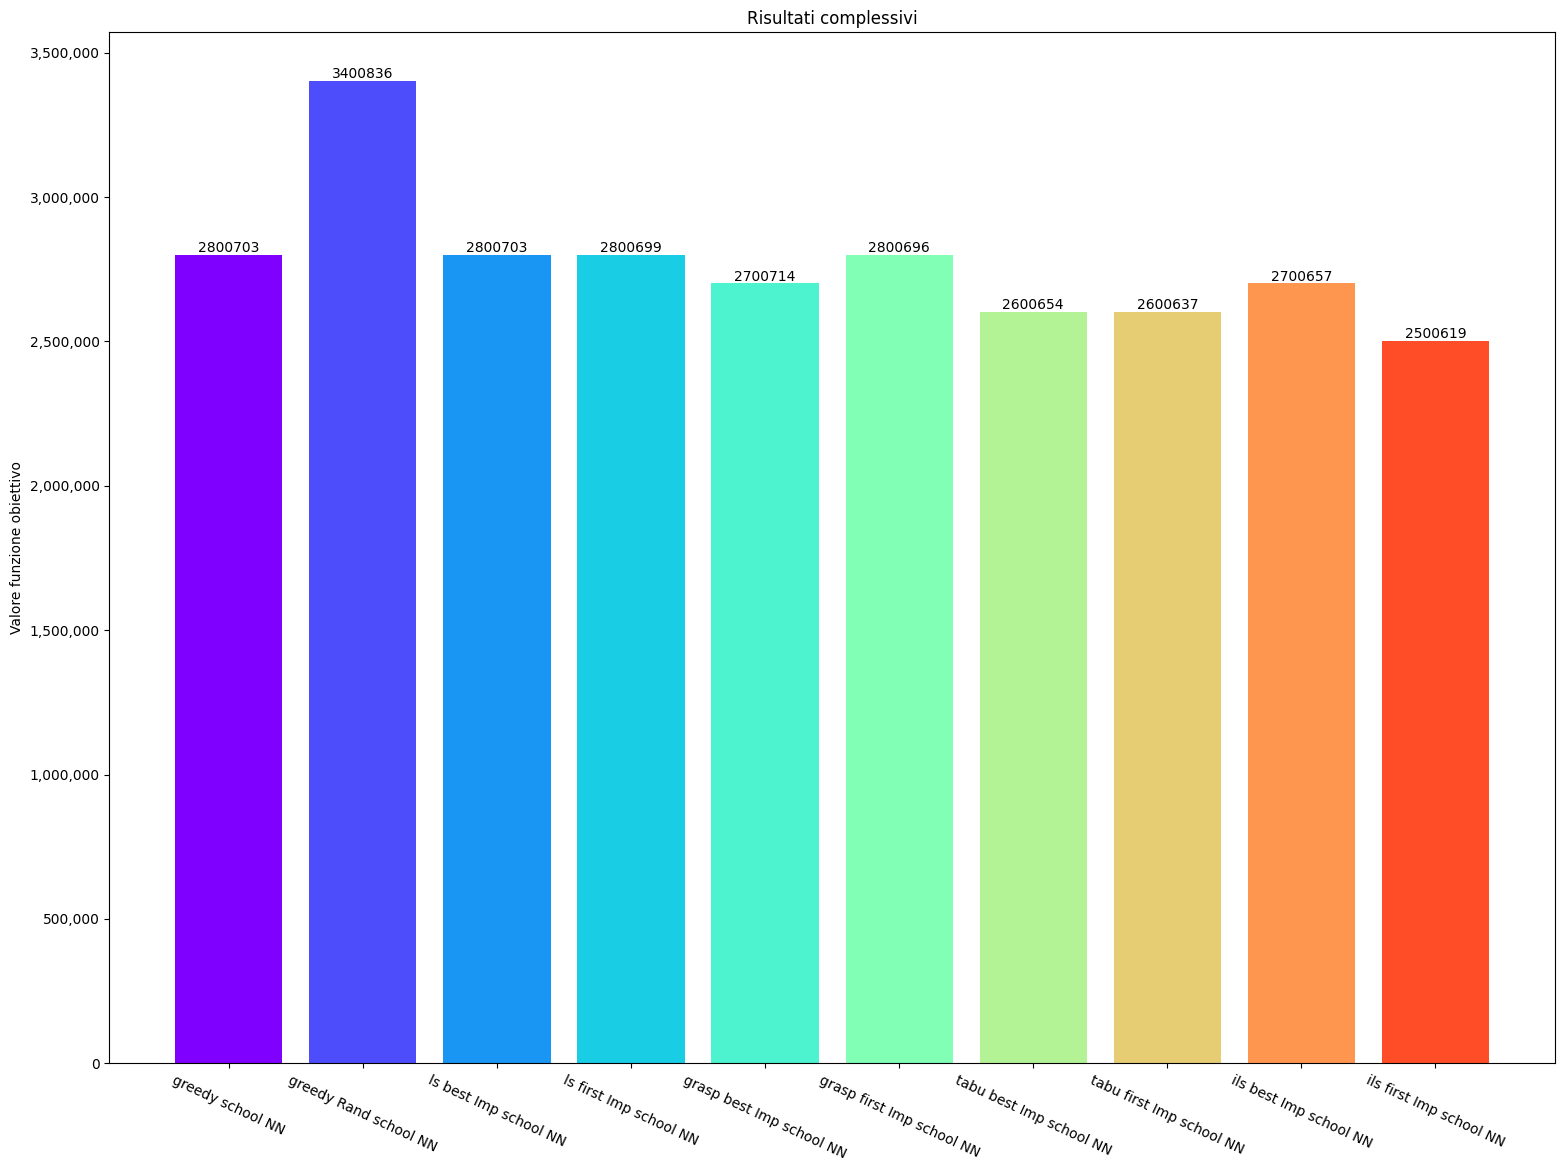

In [31]:
subsequent_results = []
school_results = []

subsequent_results.extend(subsequentNN)
subsequent_results.extend(ls_subsequentNN)
subsequent_results.extend(grasp_subsequentNN)
subsequent_results.extend(tabu_subsequentNN)
subsequent_results.extend(Ils_subsequentNN)

school_results.extend(schoolNN)
school_results.extend(ls_schoolNN)
school_results.extend(grasp_schoolNN)
school_results.extend(tabu_schoolNN)
school_results.extend(Ils_schoolNN)

plot_greedy_based_results(subsequent_results, img + 'subsequent_results_small.png', 'SubsequentNN')
plot_greedy_based_results(school_results,  img + 'school_results_small.png', 'SchoolNN')

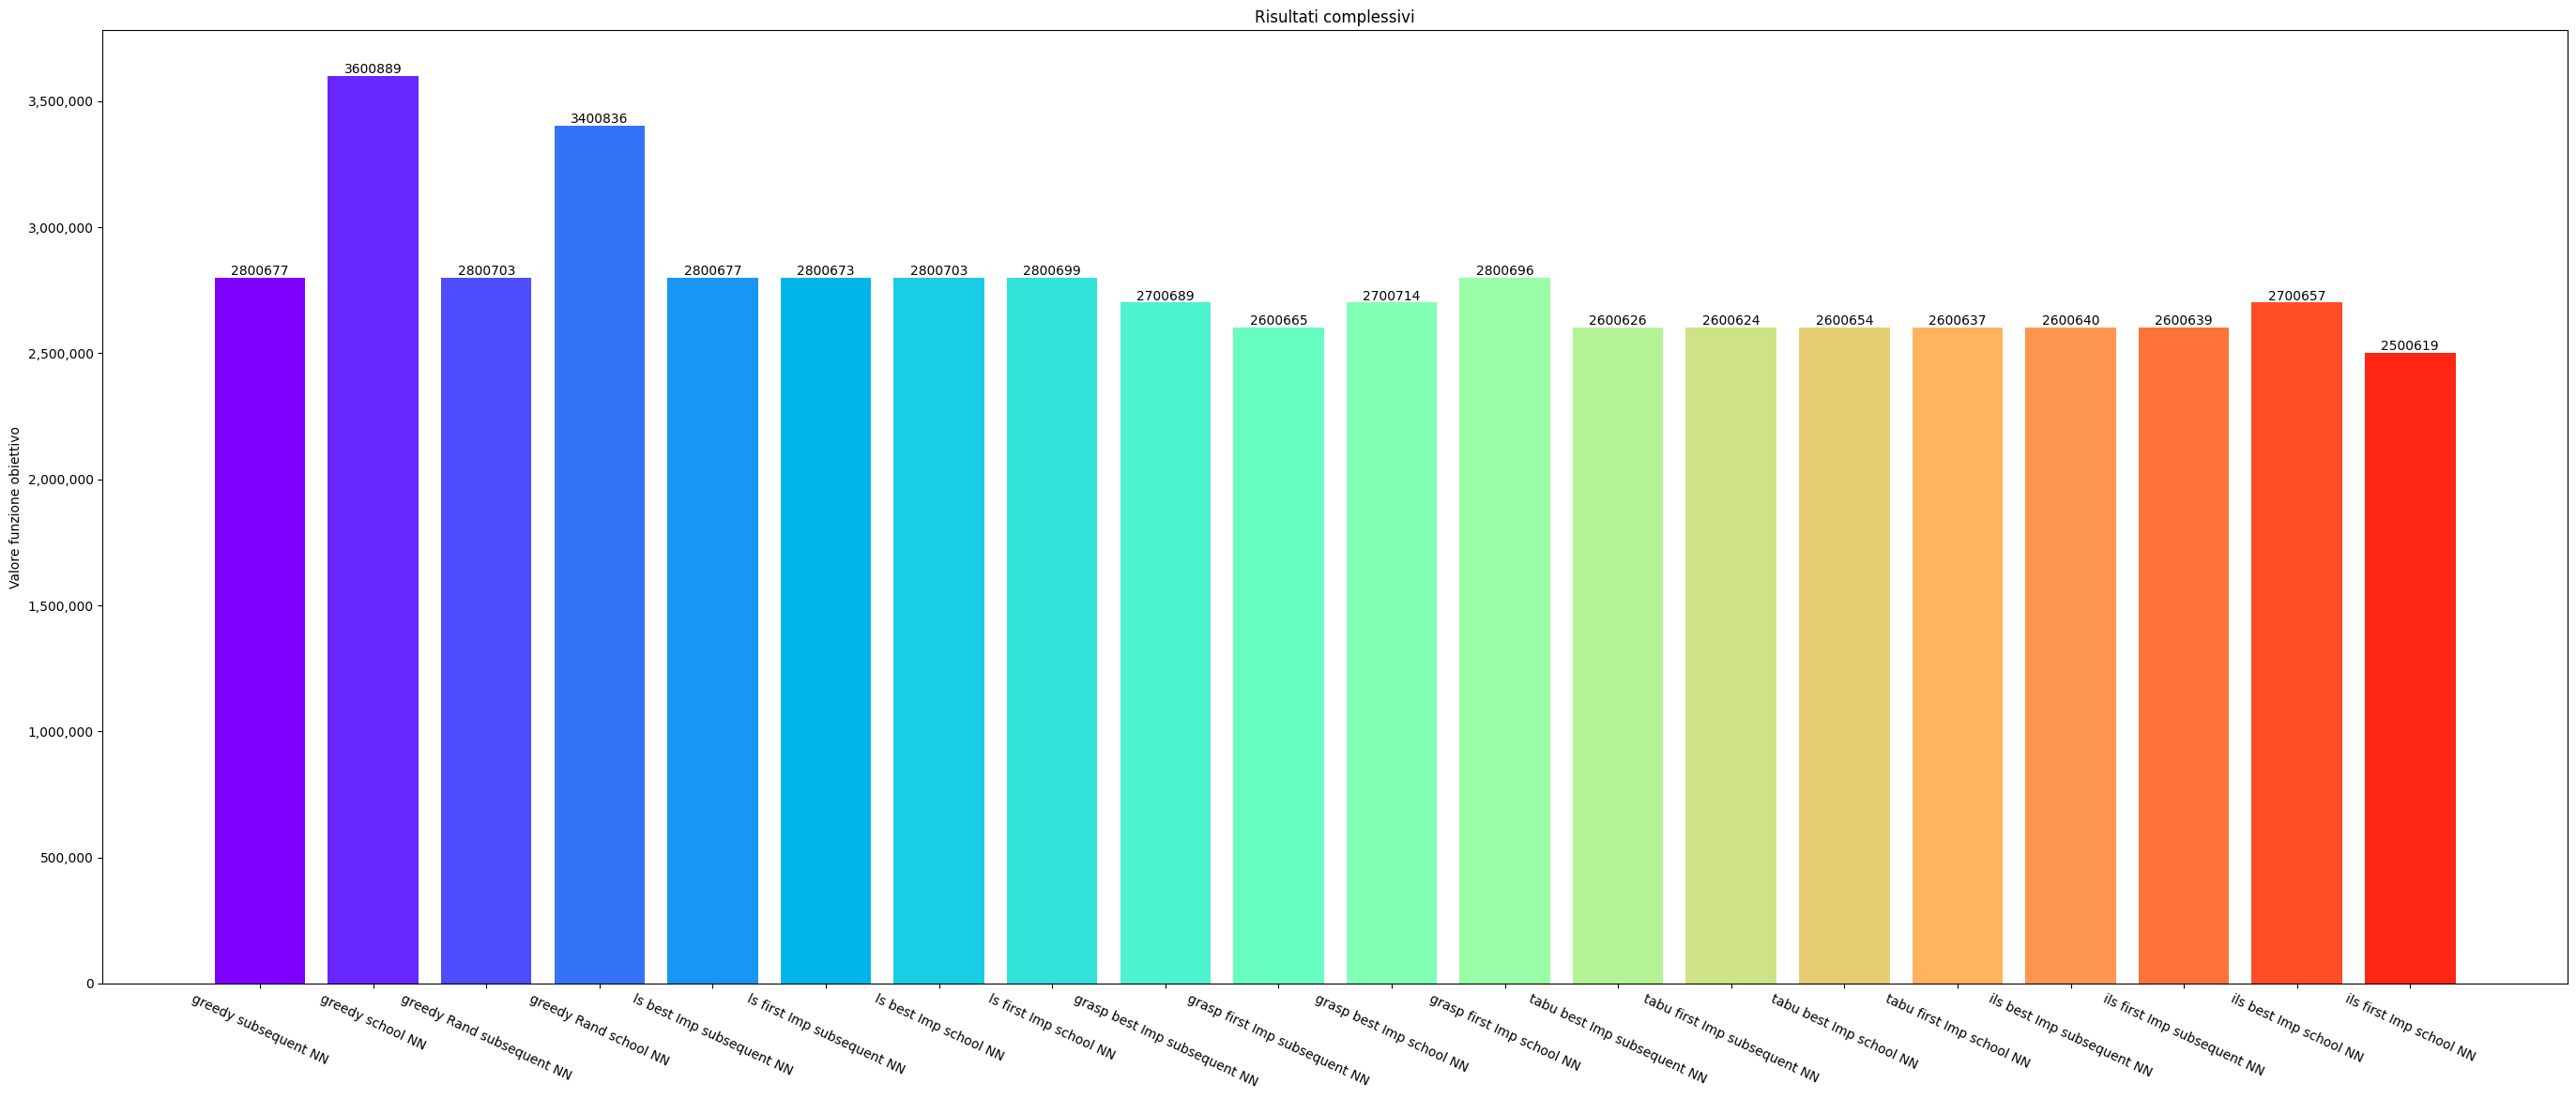

In [32]:
results = []
results.extend(subsequentNN)
results.extend(schoolNN)
results.extend(ls_subsequentNN)
results.extend(ls_schoolNN)
results.extend(grasp_subsequentNN)
results.extend(grasp_schoolNN)
results.extend(tabu_subsequentNN)
results.extend(tabu_schoolNN)
results.extend(Ils_subsequentNN)
results.extend(Ils_schoolNN)



plot_all_results(results, img + 'all_small.png')

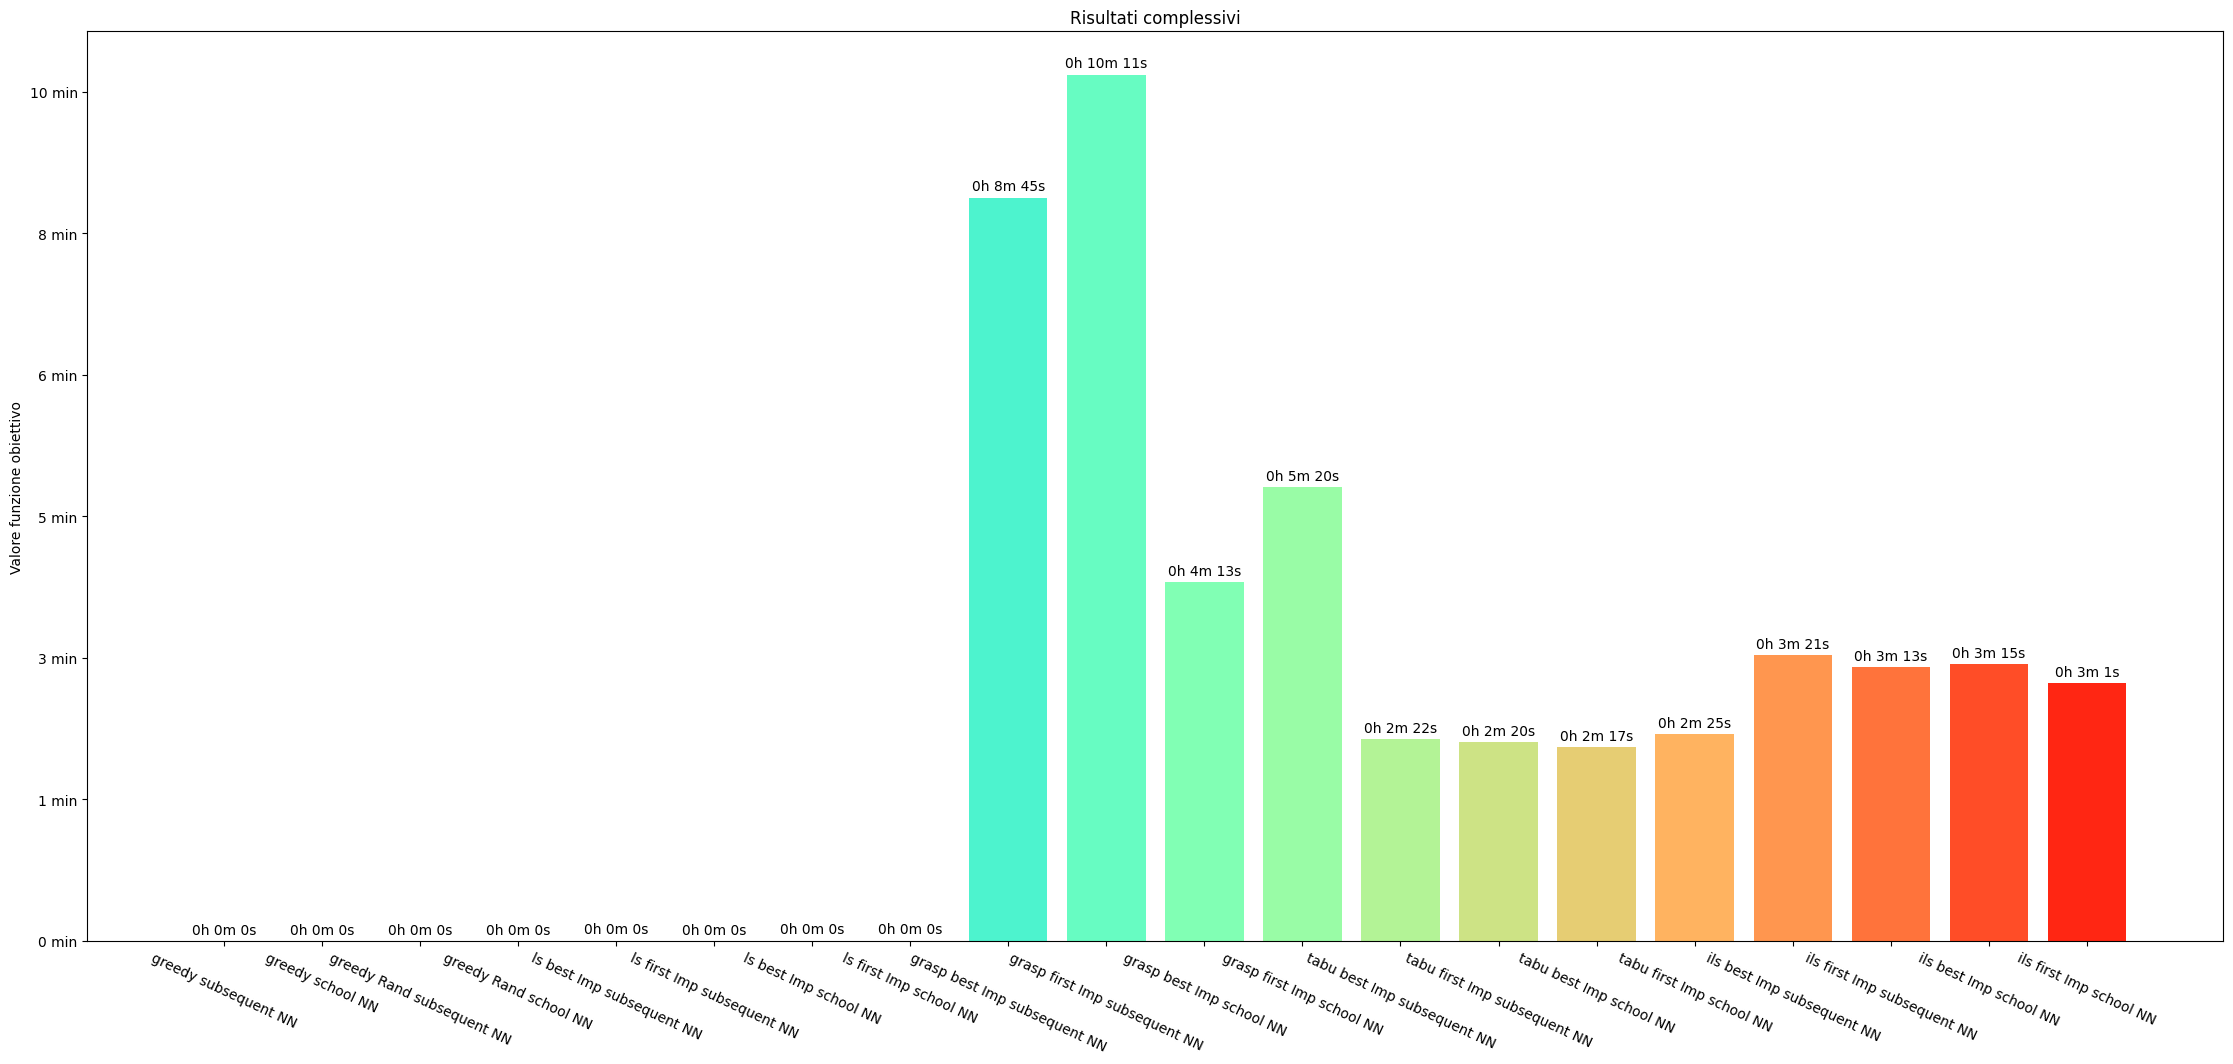

In [33]:
plot_time_results(times_small, img + 'times_small.png')

# Clark and Wright

Tempo impiegato: 00:01:8.487807
### Visualizzazione dei Percorsi ###

Percorso 1: Scuola → Bambino_4 → Bambino_18
Percorso 2: Scuola → Bambino_6 → Bambino_108
Percorso 3: Scuola → Bambino_59 → Bambino_119
Percorso 4: Scuola → Bambino_72 → Bambino_197
Percorso 5: Scuola → Bambino_122 → Bambino_159
Percorso 6: Scuola → Bambino_20 → Bambino_50
Percorso 7: Scuola → Bambino_86 → Bambino_97
Percorso 8: Scuola → Bambino_169 → Bambino_173
Percorso 9: Scuola → Bambino_2 → Bambino_25 → Bambino_87 → Bambino_118 → Bambino_10 → Bambino_189 → Bambino_22 → Bambino_184 → Bambino_65 → Bambino_110
Percorso 10: Scuola → Bambino_44 → Bambino_162
Percorso 11: Scuola → Bambino_200 → Bambino_103 → Bambino_101 → Bambino_176 → Bambino_40 → Bambino_148
Percorso 12: Scuola → Bambino_146 → Bambino_182
Percorso 13: Scuola → Bambino_74 → Bambino_24 → Bambino_164 → Bambino_60 → Bambino_179
Percorso 14: Scuola → Bambino_147 → Bambino_193
Percorso 15: Scuola → Bambino_161 → Bambino_89 → Bambino_53 → Bambino_100 → Bamb

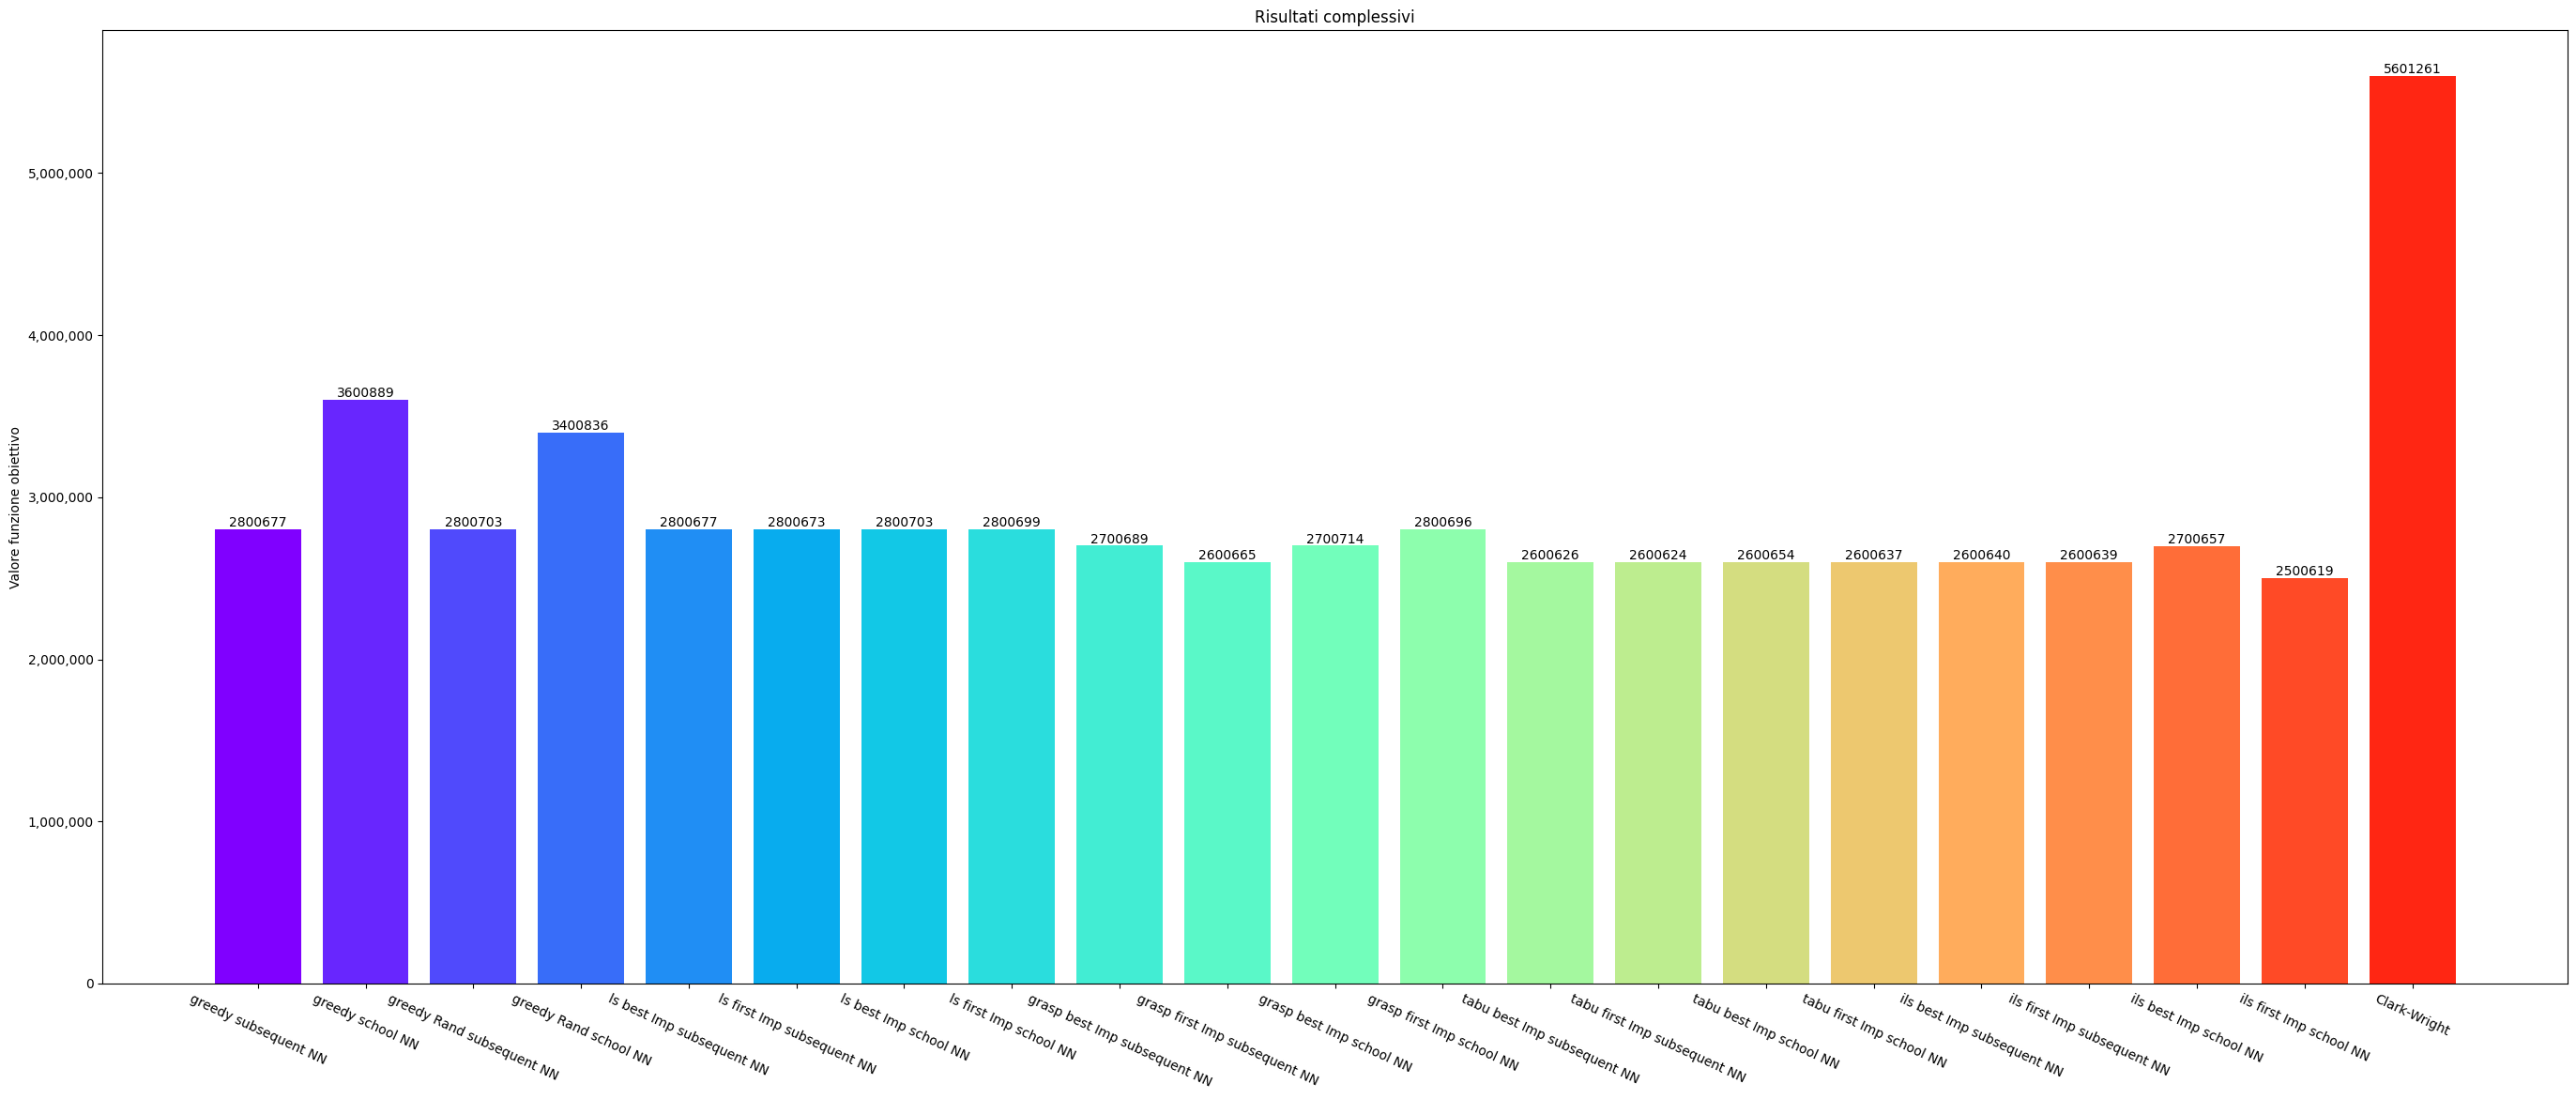

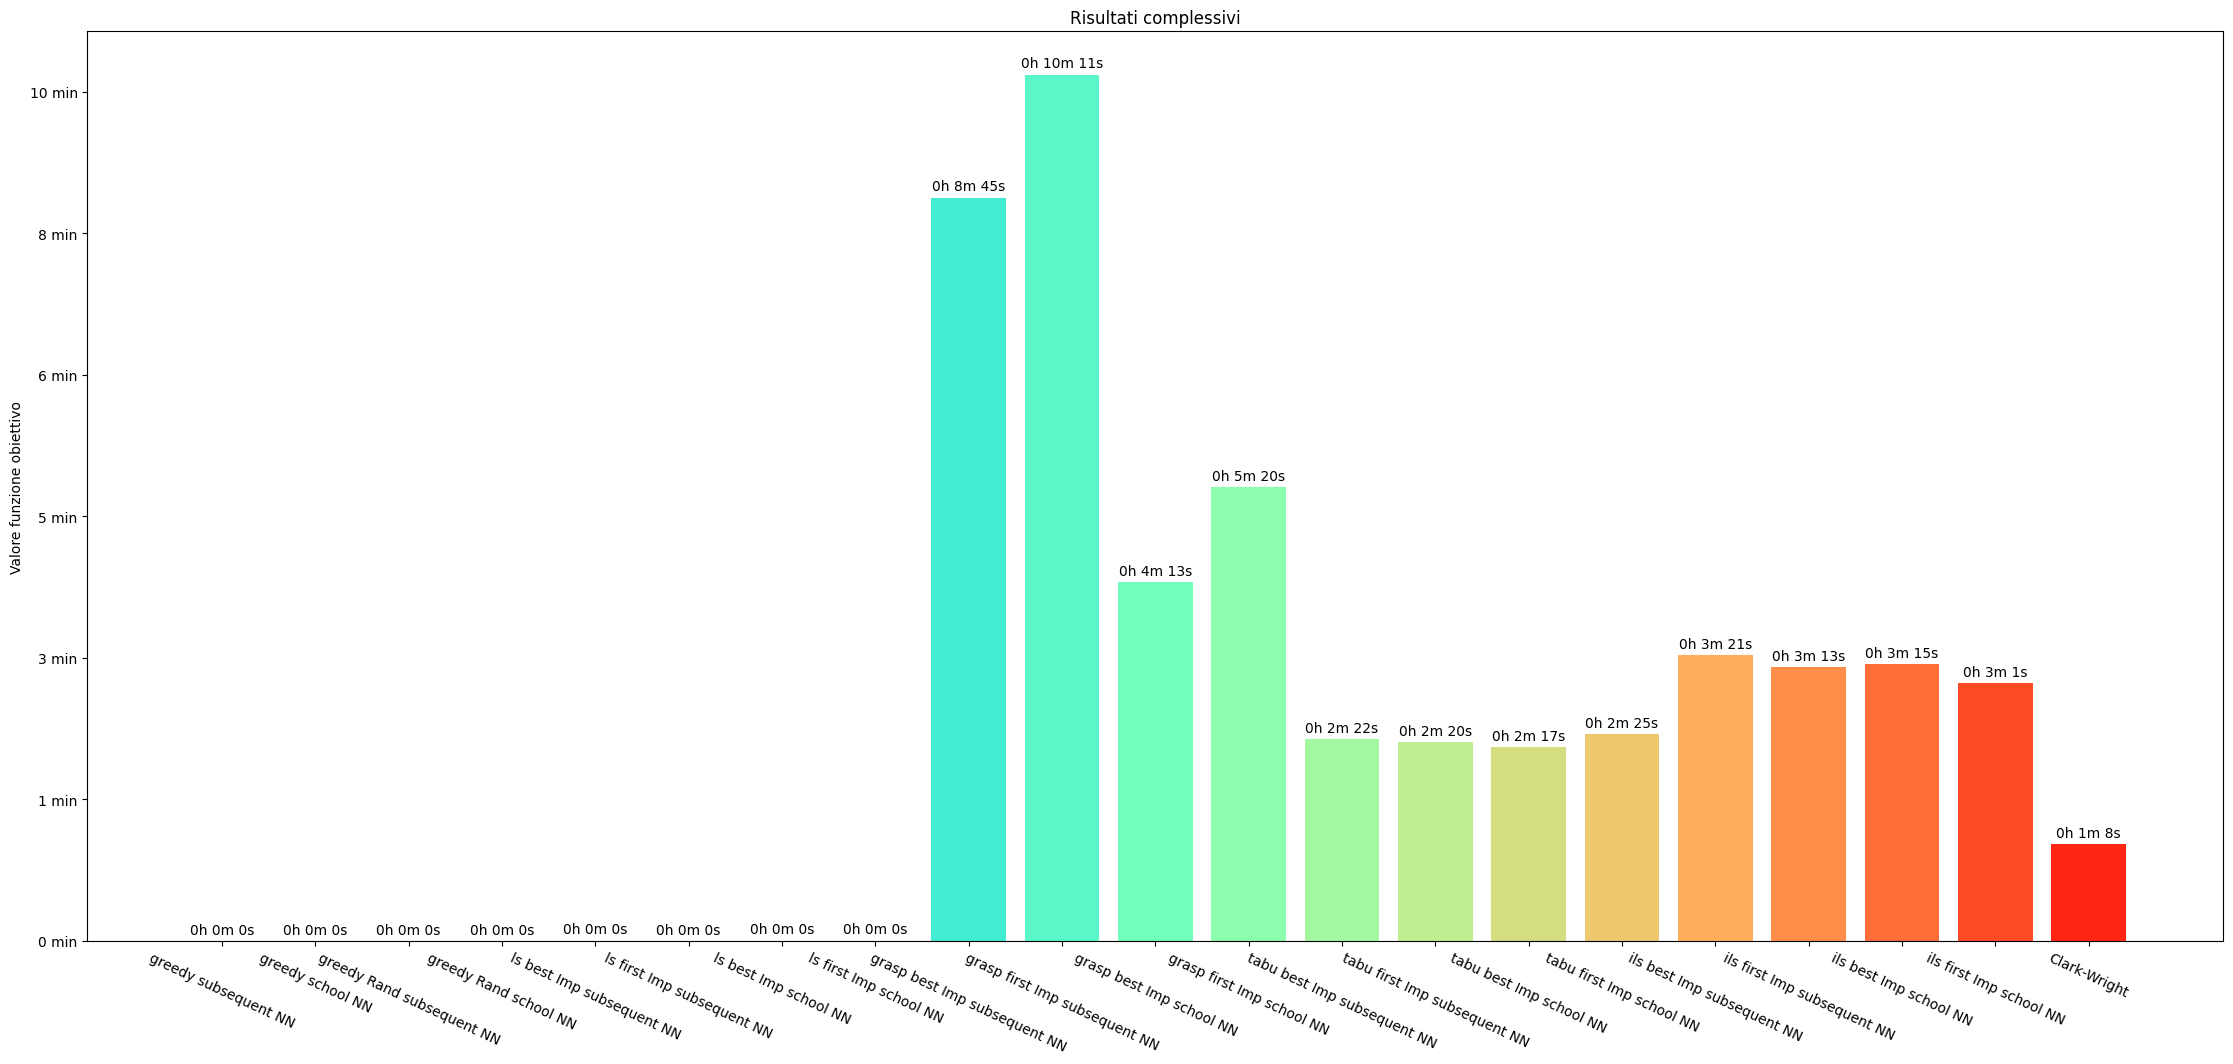

In [34]:
(percorsi_cw, cw_obj_val, residui_dict_small_cw), time = clark_wright(G_small, residui_dict_small, delta_small)
stampa_percorsi(percorsi_cw)
print(f"Funzione obiettivo: {cw_obj_val}")
check_solution(percorsi_cw, G_small, delta_small)

results.append(cw_obj_val)
times_small.append(time)

plot_all_results(results, img + 'all_small_cw.png', cw=True)
plot_time_results(times_small, img + 'all_times_small_cw.png', cw=True)